# Capstone_project_Web&SocialMedia_Utkarsh Mishra

**Problem Given-**

---



Suppose your customer is a mobile manufacturer based in the US, which entered the market three years ago. As they are a new entrant in the sector, they want to understand their competitors and preferences of their users so that they can design their strategies accordingly. They want to tweak the marketing strategies to add more value to their brand, provide features to customers that add the most value, and close the demand-supply gap. Their objective is to increase the market share as well as the brand value.

Assume that as a data analytics provider, you have been approached by this mobile phone manufacturer. They want you to provide them with some major insights into the mobile phone industry to help them achieve their objective. Their objective is to develop a new product optimally and create some marketing strategies.

**Business Objective**
1.   Put the business insights that are useful for product development and marketing.
2.   Developing a sentiment classification engine.




**Following steps taken to get the output.**

Step 1: Data pre-processing

Step 2: EDA

Step 3: Text analytics

Step 4: Building a sentiment classification engine

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Importing the Libraries

import pandas as pd
import numpy as np
import json

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

****Understanding the data**

In [7]:
# Reading the unzipped meta data into a Python list. The result will be a list of dictionaries. 
import json

# Empty list to store the dictonaries
phonemetadata = []

# Reading the dictionaries in the json file and appending it to the list phonemetadata[]
with open('/content/drive/MyDrive/Colab Notebooks/Web_and_social_media_analytics/meta_Cell_Phones_and_Accessories.json', 'r') as f:
    for line in f:
        phonemetadata.append(json.loads(line))

In [8]:
# find out number of entries in the phonemetadata list

len(phonemetadata)

590071

In [9]:
#converting the list phonemetadata into a data frame

df_meta = pd.DataFrame(phonemetadata)

In [10]:
df_meta.head()

category tech1  \
0  [Cell Phones & Accessories, Accessories, Scree...         
1  [Cell Phones & Accessories, Accessories, Car A...         
2  [Cell Phones & Accessories, Cases, Holsters & ...         
3  [Cell Phones & Accessories, Cases, Holsters & ...         
4  [Cell Phones & Accessories, Cases, Holsters & ...         

                                         description fit  \
0                                                 []       
1                                                 []       
2  [New items to give you a new good mood, welcom...       
3  [A brand-new, unused, unopened, undamaged item...       
4  [A brand-new, unused, unopened, undamaged item...       

                                               title also_buy image tech2  \
0                     Trollies Sing a Long Party VHS       []    []         
1                                        La Pura VHS       []    []         
2  Leopard Thanksgiving Easter PC Black Case for ...       []    []         
3  Puppies Faceplate Hard Case Protector for Net1...       []    []         
4  White Wolf Faceplate Protector Hard Case for S...       []    []         

               brand                                            feature  \
0                                                                    []   
1    Maribel Guardia                                                 []   
2                                                                    []   
3         Live2Pedal  [Protect your phone with style through this At...   
4  wirelessoutletusa  [Protect your phone with style through this At...   

                                                rank also_view  \
0                           557,379 in Movies & TV (        []   
1                         1,024,449 in Movies & TV (        []   
2                               5,315,017 in Books (        []   
3  [>#6,368,825 in Cell Phones & Accessories (See...        []   
4  [>#2,672,454 in Cell Phones & Accessories (See...        []   

                                             details  \
0                           {'ASIN: ': '6303195164'}   
1                           {'ASIN: ': '630524412X'}   
2  {'Publisher:': 'juduiou', 'ASIN:': '6310200240...   
3                                                 {}   
4                                                 {}   

                    main_cat similar_item date price        asin  
0                Movies & TV                          6303195164  
1                Movies & TV                          630524412X  
2                      Books                          6310200240  
3  Cell Phones & Accessories                          6786501710  
4  Cell Phones & Accessories                          6786501273

In [11]:
df_meta.shape

(590071, 18)

In [12]:
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590071 entries, 0 to 590070
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   category      590071 non-null  object
 1   tech1         590071 non-null  object
 2   description   590071 non-null  object
 3   fit           590071 non-null  object
 4   title         590071 non-null  object
 5   also_buy      590071 non-null  object
 6   image         590071 non-null  object
 7   tech2         590071 non-null  object
 8   brand         590071 non-null  object
 9   feature       590071 non-null  object
 10  rank          590071 non-null  object
 11  also_view     590071 non-null  object
 12  details       590071 non-null  object
 13  main_cat      590071 non-null  object
 14  similar_item  590071 non-null  object
 15  date          590071 non-null  object
 16  price         590071 non-null  object
 17  asin          590071 non-null  object
dtypes: object(18)
memory usa

****Reading the data**

In [13]:
# Reading the .csv file of the Cell Phones and Accessories into a dataframe

df_celldata = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Web_and_social_media_analytics/Cell_Phones_and_Accessories_5.csv')

In [14]:
df_celldata.head()

overall  verified      reviewerID        asin                 style  \
0      5.0      True  A24E3SXTC62LJI  7508492919  {'Color:': ' Bling'}   
1      5.0      True  A269FLZCB4GIPV  7508492919                   NaN   
2      3.0      True   AB6CHQWHZW4TV  7508492919                   NaN   
3      2.0      True   A1M117A53LEI8  7508492919                   NaN   
4      4.0      True  A272DUT8M88ZS8  7508492919                   NaN   

       reviewerName                                         reviewText  \
0  Claudia Valdivia  Looks even better in person. Be careful to not...   
1       sarah ponce  When you don't want to spend a whole lot of ca...   
2               Kai  so the case came on time, i love the design. I...   
3   Sharon Williams  DON'T CARE FOR IT.  GAVE IT AS A GIFT AND THEY...   
4   Bella Rodriguez  I liked it because it was cute, but the studs ...   

                               summary  unixReviewTime vote image  \
0  Can't stop won't stop looking at it      1407110400  NaN   NaN   
1                                    1      1392163200  NaN   NaN   
2                             Its okay      1391817600  NaN   NaN   
3                                 CASE      1391472000  NaN   NaN   
4                                Cute!      1391385600  NaN   NaN   

  review_sentiment  
0         POSITIVE  
1         POSITIVE  
2         NEGATIVE  
3         POSITIVE  
4         POSITIVE

In [15]:
len(df_celldata)

1128437

In [16]:
df_celldata.shape

(1128437, 12)

In [17]:
df_celldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128437 entries, 0 to 1128436
Data columns (total 12 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   overall           1128437 non-null  float64
 1   verified          1128437 non-null  bool   
 2   reviewerID        1128437 non-null  object 
 3   asin              1128437 non-null  object 
 4   style             605241 non-null   object 
 5   reviewerName      1128281 non-null  object 
 6   reviewText        1127669 non-null  object 
 7   summary           1127912 non-null  object 
 8   unixReviewTime    1128437 non-null  int64  
 9   vote              92034 non-null    object 
 10  image             27107 non-null    object 
 11  review_sentiment  1128437 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 95.8+ MB


**Observation**:
 

*   Data is not in good shape and need to treat the missing values, removing duplicates, filtering and etc.
*   The dataframe has bool(1), float64(1), int64(1), object(9) values.
It has 12 columns and more than 11 lac rows.
Need to format unixReviewTime

In [18]:
#Reading the .csv file of the phone data into a dataframe

df_phonedata = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Web_and_social_media_analytics/phone_data_final.csv', index_col=0, header=0)
df_phonedata.head(5)

overall  verified  unixReviewTime      reviewerID        asin  \
0      1.0     False      1095724800   A5JLAU2ARJ0BO  B0000E3GWH   
1      4.0     False      1090627200  A1ACM1CBGORBN1  B0000E3GWH   
2      3.0     False      1089072000  A2V48Q03FZUOSD  B0000E3GWH   
3      5.0      True      1081728000  A1V3TRGWOMA8LC  B0000E3GWH   
4      3.0     False      1077148800  A3NOBH42C7UI5M  B0000E3GWH   

                                          reviewText  \
0  This phone is ugly and heavy and has a terribl...   
1  I had the Samsung V205 and then I decided to t...   
2  This is the first Samsung phone I have had and...   
3  ..and I'm from Europe, where the phones and ne...   
4  This phone is amazingly small and light for a ...   

                                            category also_view    brand price  \
0  ['Cell Phones & Accessories', 'Cell Phones', '...        []  Samsung   NaN   
1  ['Cell Phones & Accessories', 'Cell Phones', '...        []  Samsung   NaN   
2  ['Cell Phones & Accessories', 'Cell Phones', '...        []  Samsung   NaN   
3  ['Cell Phones & Accessories', 'Cell Phones', '...        []  Samsung   NaN   
4  ['Cell Phones & Accessories', 'Cell Phones', '...        []  Samsung   NaN   

                                  cleaned_reviewText review_sentiment  \
0  phone ugly heavy terrible user interface techi...         NEGATIVE   
1  samsung v205 decided try e715 fyi people batte...         POSITIVE   
2  samsung phone not measure v300 am tmobile cust...         NEGATIVE   
3  i'm europe phones networks better samsung curr...         POSITIVE   
4  phone amazingly light camera phone flashlight ...         POSITIVE   

    Date&Time  
0  2004-09-20  
1  2004-07-23  
2  2004-07-05  
3  2004-04-11  
4  2004-02-18

In [19]:
len(df_phonedata)

61946

In [20]:
df_phonedata.shape

(61946, 13)

In [21]:
df_phonedata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61946 entries, 0 to 62090
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   overall             61946 non-null  float64
 1   verified            61946 non-null  bool   
 2   unixReviewTime      61946 non-null  int64  
 3   reviewerID          61946 non-null  object 
 4   asin                61946 non-null  object 
 5   reviewText          61946 non-null  object 
 6   category            61946 non-null  object 
 7   also_view           61946 non-null  object 
 8   brand               61880 non-null  object 
 9   price               28311 non-null  object 
 10  cleaned_reviewText  61946 non-null  object 
 11  review_sentiment    61946 non-null  object 
 12  Date&Time           61946 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(10)
memory usage: 6.2+ MB


**Observation:**


*   The dataframe has bool(1), float64(1), int64(1), object(10) values and We can see some missing values too in price and brand columns.
*   This dataframe seems to be the consolidated better version of df_meta and df_celldata. Hence we will not use this data further.





**Observation-**



*   df_celldata seems to have more larger entries.
*   Cell data and phone data seems to have similar attributes but with different shape and content. Need a further analysis.



**Reading other datasets to get understanding of their usages**

In [22]:
df_poscorpus = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Web_and_social_media_analytics/positive_corpus.xlsx', index_col=None, header=0)
df_poscorpus.head()

cleaned_reviewText     brand
0  battery charge battery life battery life displ...   Samsung
1                                                NaN   Samsung
2  camera battery life charge camera button camer...   Samsung
3  camera quality quality quality camera battery ...   Samsung
4                              battery charge charge  Motorola

In [23]:
df_poswords = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Web_and_social_media_analytics/pos_words.txt', sep=' ', header=None)
df_poswords.head()

0
0         a+
1     abound
2    abounds
3  abundance
4   abundant

**Reading and understanding the Negative comments File**

In [24]:
df_negcorpus = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Web_and_social_media_analytics/negative_corpus.xlsx', index_col=None, header=0)
df_negcorpus.head()

cleaned_reviewText     brand
0                                                NaN   Samsung
1                       camera camera quality camera   Samsung
2                                             charge  Motorola
3                                              price  Motorola
4  camera quality display battery life camera qua...  Motorola

In [25]:
df_negwords = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Web_and_social_media_analytics/neg_words.txt', sep=' ', header=None)
df_negwords.head()

0
0   against
1    aren't
2     can't
3    cannot
4  couldn't

***Undertsanding and reading Phone reviews**

In [26]:
df_phonereviews = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Web_and_social_media_analytics/phone_reviews.csv', index_col=None, header=0)
df_phonereviews.head()

overall  verified      reviewerID        asin  \
0      1.0     False   A5JLAU2ARJ0BO  B0000E3GWH   
1      4.0     False  A1ACM1CBGORBN1  B0000E3GWH   
2      3.0     False  A2V48Q03FZUOSD  B0000E3GWH   
3      5.0      True  A1V3TRGWOMA8LC  B0000E3GWH   
4      3.0     False  A3NOBH42C7UI5M  B0000E3GWH   

                                          reviewText      asin.1  \
0  This phone is ugly and heavy and has a terribl...  B0000E3GWH   
1  I had the Samsung V205 and then I decided to t...  B0000E3GWH   
2  This is the first Samsung phone I have had and...  B0000E3GWH   
3  ..and I'm from Europe, where the phones and ne...  B0000E3GWH   
4  This phone is amazingly small and light for a ...  B0000E3GWH   

   unixReviewTime                                           category  \
0      1095724800  ['Cell Phones & Accessories', 'Cell Phones', '...   
1      1090627200  ['Cell Phones & Accessories', 'Cell Phones', '...   
2      1089072000  ['Cell Phones & Accessories', 'Cell Phones', '...   
3      1081728000  ['Cell Phones & Accessories', 'Cell Phones', '...   
4      1077148800  ['Cell Phones & Accessories', 'Cell Phones', '...   

  also_view    brand price review_sentiment  
0        []  Samsung   NaN         NEGATIVE  
1        []  Samsung   NaN         POSITIVE  
2        []  Samsung   NaN         NEGATIVE  
3        []  Samsung   NaN         POSITIVE  
4        []  Samsung   NaN         POSITIVE

In [27]:
df_phonereviews.shape

(62091, 12)

In [28]:
df_phonereviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62091 entries, 0 to 62090
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   overall           62091 non-null  float64
 1   verified          62091 non-null  bool   
 2   reviewerID        62091 non-null  object 
 3   asin              62091 non-null  object 
 4   reviewText        62091 non-null  object 
 5   asin.1            62091 non-null  object 
 6   unixReviewTime    62091 non-null  int64  
 7   category          62091 non-null  object 
 8   also_view         62091 non-null  object 
 9   brand             62025 non-null  object 
 10  price             28382 non-null  object 
 11  review_sentiment  62091 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 5.3+ MB


***Understanding and reading the review sentimental**

In [29]:
df_revsent = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Web_and_social_media_analytics/review_sentiment.csv', index_col=None, header=0)
df_revsent.head()

overall  verified      reviewerID        asin  \
0      1.0     False   A5JLAU2ARJ0BO  B0000E3GWH   
1      4.0     False  A1ACM1CBGORBN1  B0000E3GWH   
2      3.0     False  A2V48Q03FZUOSD  B0000E3GWH   
3      5.0      True  A1V3TRGWOMA8LC  B0000E3GWH   
4      3.0     False  A3NOBH42C7UI5M  B0000E3GWH   

                                          reviewText      asin.1  \
0  This phone is ugly and heavy and has a terribl...  B0000E3GWH   
1  I had the Samsung V205 and then I decided to t...  B0000E3GWH   
2  This is the first Samsung phone I have had and...  B0000E3GWH   
3  ..and I'm from Europe, where the phones and ne...  B0000E3GWH   
4  This phone is amazingly small and light for a ...  B0000E3GWH   

   unixReviewTime                                           category  \
0      1095724800  ['Cell Phones & Accessories', 'Cell Phones', '...   
1      1090627200  ['Cell Phones & Accessories', 'Cell Phones', '...   
2      1089072000  ['Cell Phones & Accessories', 'Cell Phones', '...   
3      1081728000  ['Cell Phones & Accessories', 'Cell Phones', '...   
4      1077148800  ['Cell Phones & Accessories', 'Cell Phones', '...   

  also_view    brand price review_sentiment  \
0        []  Samsung   NaN         NEGATIVE   
1        []  Samsung   NaN         POSITIVE   
2        []  Samsung   NaN         NEGATIVE   
3        []  Samsung   NaN         POSITIVE   
4        []  Samsung   NaN         POSITIVE   

                                  cleaned_reviewText  
0  phone ugly heavy terrible user interface techi...  
1  samsung v205 decided try e715 fyi people batte...  
2  samsung phone not measure v300 am tmobile cust...  
3  i'm europe phones networks better samsung curr...  
4  phone amazingly light camera phone flashlight ...

***Understanding and reading Brand and Asins file**

In [30]:
df_brandasins = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Web_and_social_media_analytics/Brands and Asins.csv', index_col=None, header=0)
df_brandasins.head()

asin    brand
0  8050110508      Ice
1  B00005KBGR    Nokia
2  B00006J9HH      NaN
3  B00006LIQB  Samsung
4  B00008KGAG    Nokia

**Observation:**
df_brandasins contains the unique asin codes for brands listed on Amazon.

***Merging df_meta and df_celldata For further analysis.**

In [31]:
# Merging df_meta and df_celldata using the unique asin column values

merge_df = df_meta.merge(df_celldata, on = "asin")

In [32]:
merge_df.head(10)

category tech1  \
0  [Cell Phones & Accessories, Cases, Holsters & ...         
1  [Cell Phones & Accessories, Cases, Holsters & ...         
2  [Cell Phones & Accessories, Cases, Holsters & ...         
3  [Cell Phones & Accessories, Cases, Holsters & ...         
4  [Cell Phones & Accessories, Cases, Holsters & ...         
5  [Cell Phones & Accessories, Cases, Holsters & ...         
6  [Cell Phones & Accessories, Cases, Holsters & ...         
7  [Cell Phones & Accessories, Cases, Holsters & ...         
8  [Cell Phones & Accessories, Cases, Holsters & ...         
9  [Cell Phones & Accessories, Cases, Holsters & ...         

                                         description fit  \
0  [, Elegani Butterfly Case 3D Pattern Back Cove...       
1  [, Elegani Butterfly Case 3D Pattern Back Cove...       
2  [, Elegani Butterfly Case 3D Pattern Back Cove...       
3  [, Elegani Butterfly Case 3D Pattern Back Cove...       
4  [, Elegani Butterfly Case 3D Pattern Back Cove...       
5  [, Elegani Butterfly Case 3D Pattern Back Cove...       
6  [, Elegani Butterfly Case 3D Pattern Back Cove...       
7  [, Elegani Butterfly Case 3D Pattern Back Cove...       
8  [, Elegani Butterfly Case 3D Pattern Back Cove...       
9  [, Elegani Butterfly Case 3D Pattern Back Cove...       

                                               title also_buy  \
0  MinisDesign 3d Bling Crystal Bow Transparent C...       []   
1  MinisDesign 3d Bling Crystal Bow Transparent C...       []   
2  MinisDesign 3d Bling Crystal Bow Transparent C...       []   
3  MinisDesign 3d Bling Crystal Bow Transparent C...       []   
4  MinisDesign 3d Bling Crystal Bow Transparent C...       []   
5  MinisDesign 3d Bling Crystal Bow Transparent C...       []   
6  MinisDesign 3d Bling Crystal Bow Transparent C...       []   
7  MinisDesign 3d Bling Crystal Bow Transparent C...       []   
8  MinisDesign 3d Bling Crystal Bow Transparent C...       []   
9  MinisDesign 3d Bling Crystal Bow Transparent C...       []   

                                             image_x tech2    brand  \
0  [https://images-na.ssl-images-amazon.com/image...        ELEGANI   
1  [https://images-na.ssl-images-amazon.com/image...        ELEGANI   
2  [https://images-na.ssl-images-amazon.com/image...        ELEGANI   
3  [https://images-na.ssl-images-amazon.com/image...        ELEGANI   
4  [https://images-na.ssl-images-amazon.com/image...        ELEGANI   
5  [https://images-na.ssl-images-amazon.com/image...        ELEGANI   
6  [https://images-na.ssl-images-amazon.com/image...        ELEGANI   
7  [https://images-na.ssl-images-amazon.com/image...        ELEGANI   
8  [https://images-na.ssl-images-amazon.com/image...        ELEGANI   
9  [https://images-na.ssl-images-amazon.com/image...        ELEGANI   

                                             feature  \
0  [Fashionable with unique 3D butterfly design f...   
1  [Fashionable with unique 3D butterfly design f...   
2  [Fashionable with unique 3D butterfly design f...   
3  [Fashionable with unique 3D butterfly design f...   
4  [Fashionable with unique 3D butterfly design f...   
5  [Fashionable with unique 3D butterfly design f...   
6  [Fashionable with unique 3D butterfly design f...   
7  [Fashionable with unique 3D butterfly design f...   
8  [Fashionable with unique 3D butterfly design f...   
9  [Fashionable with unique 3D butterfly design f...   

                                                rank also_view details  \
0  [>#228,544 in Cell Phones & Accessories (See T...        []      {}   
1  [>#228,544 in Cell Phones & Accessories (See T...        []      {}   
2  [>#228,544 in Cell Phones & Accessories (See T...        []      {}   
3  [>#228,544 in Cell Phones & Accessories (See T...        []      {}   
4  [>#228,544 in Cell Phones & Accessories (See T...        []      {}   
5  [>#228,544 in Cell Phones & Accessories (See T...        []      {}   
6  [>#228,544 in Cell Phones & Accessories (See T...        []     

In [33]:
merge_df.shape

(1129035, 29)

In [34]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1129035 entries, 0 to 1129034
Data columns (total 29 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   category          1129035 non-null  object 
 1   tech1             1129035 non-null  object 
 2   description       1129035 non-null  object 
 3   fit               1129035 non-null  object 
 4   title             1129035 non-null  object 
 5   also_buy          1129035 non-null  object 
 6   image_x           1129035 non-null  object 
 7   tech2             1129035 non-null  object 
 8   brand             1129035 non-null  object 
 9   feature           1129035 non-null  object 
 10  rank              1129035 non-null  object 
 11  also_view         1129035 non-null  object 
 12  details           1129035 non-null  object 
 13  main_cat          1129035 non-null  object 
 14  similar_item      1129035 non-null  object 
 15  date              1129035 non-null  object 
 16  

In [35]:
merge_df.describe()

overall  unixReviewTime
count  1.129035e+06    1.129035e+06
mean   4.221165e+00    1.440369e+09
std    1.232076e+00    4.579979e+07
min    1.000000e+00    1.035331e+09
25%    4.000000e+00    1.416355e+09
50%    5.000000e+00    1.444349e+09
75%    5.000000e+00    1.470442e+09
max    5.000000e+00    1.538438e+09

**Observation:**

*   Data has a lot of noise which needs to be preprocessed.
*   After cleaning the data ,we can then start with our Exploratory Data Analysis and Text Processing.





**Pre-processing of the data**

In [36]:
merge_df.head()

category tech1  \
0  [Cell Phones & Accessories, Cases, Holsters & ...         
1  [Cell Phones & Accessories, Cases, Holsters & ...         
2  [Cell Phones & Accessories, Cases, Holsters & ...         
3  [Cell Phones & Accessories, Cases, Holsters & ...         
4  [Cell Phones & Accessories, Cases, Holsters & ...         

                                         description fit  \
0  [, Elegani Butterfly Case 3D Pattern Back Cove...       
1  [, Elegani Butterfly Case 3D Pattern Back Cove...       
2  [, Elegani Butterfly Case 3D Pattern Back Cove...       
3  [, Elegani Butterfly Case 3D Pattern Back Cove...       
4  [, Elegani Butterfly Case 3D Pattern Back Cove...       

                                               title also_buy  \
0  MinisDesign 3d Bling Crystal Bow Transparent C...       []   
1  MinisDesign 3d Bling Crystal Bow Transparent C...       []   
2  MinisDesign 3d Bling Crystal Bow Transparent C...       []   
3  MinisDesign 3d Bling Crystal Bow Transparent C...       []   
4  MinisDesign 3d Bling Crystal Bow Transparent C...       []   

                                             image_x tech2    brand  \
0  [https://images-na.ssl-images-amazon.com/image...        ELEGANI   
1  [https://images-na.ssl-images-amazon.com/image...        ELEGANI   
2  [https://images-na.ssl-images-amazon.com/image...        ELEGANI   
3  [https://images-na.ssl-images-amazon.com/image...        ELEGANI   
4  [https://images-na.ssl-images-amazon.com/image...        ELEGANI   

                                             feature  \
0  [Fashionable with unique 3D butterfly design f...   
1  [Fashionable with unique 3D butterfly design f...   
2  [Fashionable with unique 3D butterfly design f...   
3  [Fashionable with unique 3D butterfly design f...   
4  [Fashionable with unique 3D butterfly design f...   

                                                rank also_view details  \
0  [>#228,544 in Cell Phones & Accessories (See T...        []      {}   
1  [>#228,544 in Cell Phones & Accessories (See T...        []      {}   
2  [>#228,544 in Cell Phones & Accessories (See T...        []      {}   
3  [>#228,544 in Cell Phones & Accessories (See T...        []      {}   
4  [>#228,544 in Cell Phones & Accessories (See T...        []      {}   

                    main_cat similar_item date price        asin  overall  \
0  Cell Phones & Accessories                          7508492919      5.0   
1  Cell Phones & Accessories                          7508492919      5.0   
2  Cell Phones & Accessories                          7508492919      3.0   
3  Cell Phones & Accessories                          7508492919      2.0   
4  Cell Phones & Accessories                          7508492919      4.0   

   verified      reviewerID                 style      reviewerName  \
0      True  A24E3SXTC62LJI  {'Color:': ' Bling'}  Claudia Valdivia   
1      True  A269FLZCB4GIPV                   NaN       sarah ponce   
2      True   AB6CHQWHZW4TV                   NaN               Kai   
3      True   A1M117A53LEI8                   NaN   Sharon Williams   
4      True  A272DUT8M88ZS8                   NaN   Bella Rodriguez   

                                          reviewText  \
0  Looks even better in person. Be careful to not...   
1  When you don't want to spend a whole lot of ca...   
2  so the case came on time, i love the design. I...   
3  DON'T CARE FOR IT.  GAVE IT AS A GIFT AND THEY...   
4  I liked it because it was cute, but the studs ...   

                               summary  unixReviewTime vote image_y  \
0  Can't stop won't stop looking at it      1407110400  NaN     NaN   
1                                    1      1392163200  NaN     NaN   
2                             Its okay      1391817600  NaN     NaN   
3                                 CASE      1391472000  NaN     NaN   
4                                Cute!      1391385600  NaN     NaN   

  review_sentiment  
0         POSITIVE  
1         POSI

***Anatomize each columns to understand the contents and importance and decide  to keep them or drop them.**

In [37]:
merge_df.columns

Index(['category', 'tech1', 'description', 'fit', 'title', 'also_buy',
       'image_x', 'tech2', 'brand', 'feature', 'rank', 'also_view', 'details',
       'main_cat', 'similar_item', 'date', 'price', 'asin', 'overall',
       'verified', 'reviewerID', 'style', 'reviewerName', 'reviewText',
       'summary', 'unixReviewTime', 'vote', 'image_y', 'review_sentiment'],
      dtype='object')

In [38]:
# Dropping some unwanted and noisy columns

merge_df.drop(['category', 'description', 'image_x', 'rank', 'details', 'similar_item', 'date', 'image_y'],  axis = 1, inplace = True)

**Treating Missing Values**

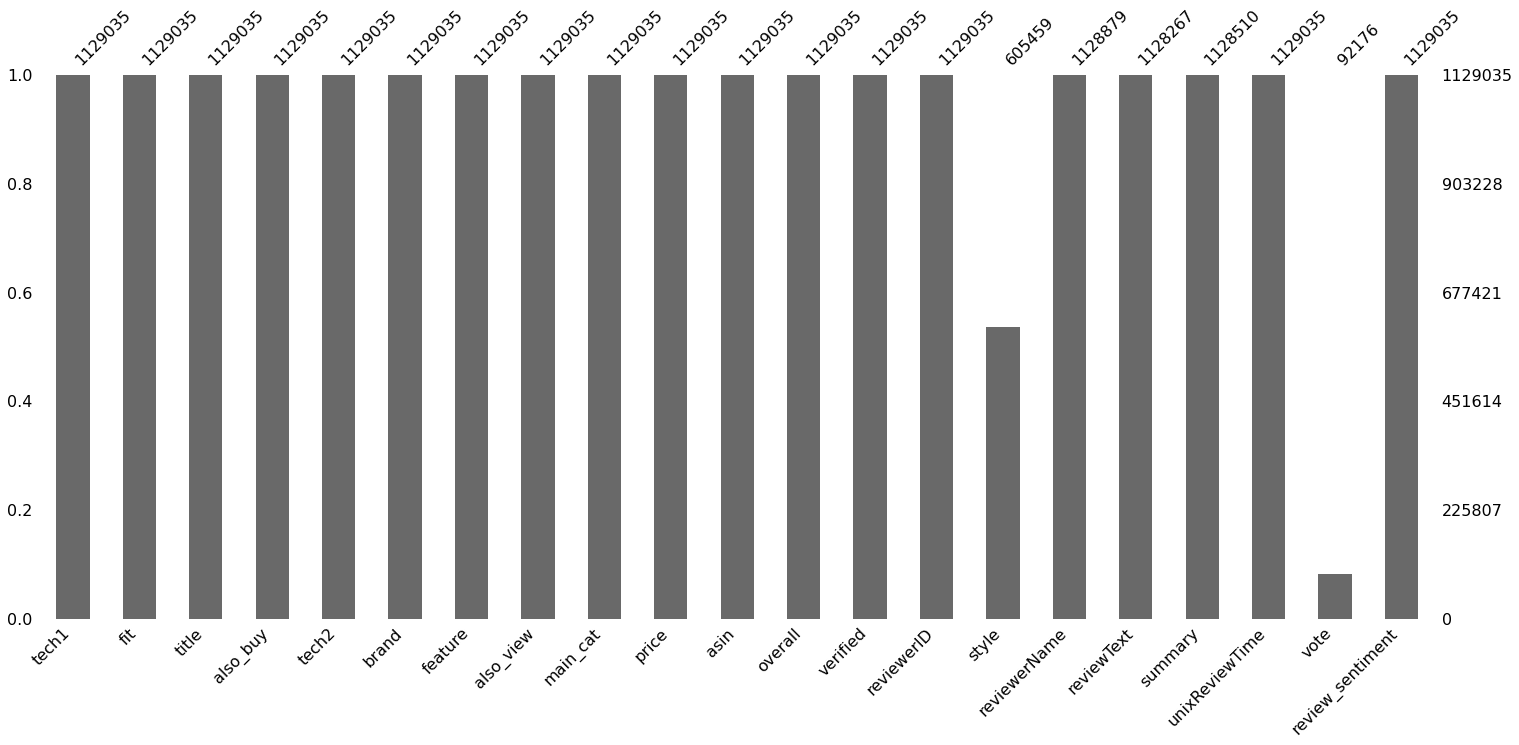

In [39]:
# Checking missing values columns

import missingno as msno
msno.bar(merge_df)

In [40]:
# Checking missing values percentages

# Checking exact Null Values

def null_values(merge_df):
    return round((merge_df.isnull().sum()/len(merge_df)*100).sort_values(ascending = False),2)

null_values(merge_df)

vote                91.84
style               46.37
reviewText           0.07
summary              0.05
reviewerName         0.01
tech1                0.00
overall              0.00
unixReviewTime       0.00
reviewerID           0.00
verified             0.00
asin                 0.00
fit                  0.00
price                0.00
main_cat             0.00
also_view            0.00
feature              0.00
brand                0.00
tech2                0.00
also_buy             0.00
title                0.00
review_sentiment     0.00
dtype: float64

**Observation:** Votes and styles has the highest missing values

In [41]:
# Dropping vote and style as it has more than 45% missing values

merge_df.drop(['vote','style'], axis = 1, inplace = True)

In [42]:
# Checking the number of columns left after dropping few of them 

merge_df.shape

(1129035, 19)

In [43]:
# Rechcking the remaing missing values

null_values(merge_df)

reviewText          0.07
summary             0.05
reviewerName        0.01
tech1               0.00
asin                0.00
unixReviewTime      0.00
reviewerID          0.00
verified            0.00
overall             0.00
price               0.00
fit                 0.00
main_cat            0.00
also_view           0.00
feature             0.00
brand               0.00
tech2               0.00
also_buy            0.00
title               0.00
review_sentiment    0.00
dtype: float64

In [44]:
# Imputing mode values in the reviewerName column. 

merge_df['reviewerName'].fillna(merge_df['reviewerName'].mode()[0], axis = 0, inplace = True)

In [45]:
# Checking missing values again: 

null_values(merge_df)

reviewText          0.07
summary             0.05
tech1               0.00
asin                0.00
unixReviewTime      0.00
reviewerName        0.00
reviewerID          0.00
verified            0.00
overall             0.00
price               0.00
fit                 0.00
main_cat            0.00
also_view           0.00
feature             0.00
brand               0.00
tech2               0.00
also_buy            0.00
title               0.00
review_sentiment    0.00
dtype: float64

In [46]:
# Dissecting or Anatomize Summary Column: 

merge_df.summary.unique()

array(["Can't stop won't stop looking at it", '1', 'Its okay', ...,
       'Not worth for the price', 'Not worth the money!!',
       "Good cover for folks that aren't clumsy"], dtype=object)

In [47]:
# Dissecting or Anatomize reviewText Column: 

merge_df.reviewText.unique()

array(['Looks even better in person. Be careful to not drop your phone so often because the rhinestones will fall off (duh). More of a decorative case than it is protective, but I will say that it fits perfectly and securely on my phone. Overall, very pleased with this purchase.',
       "When you don't want to spend a whole lot of cash but want a great deal...this is the shop to buy from!",
       "so the case came on time, i love the design. I'm actually missing 2 studs but nothing too noticeable the studding is almost a bit sloppy around the bow, but once again not too noticeable. I haven't put in my phone yet so this is just what I've notice so far",
       ...,
       'Just received it and it\'s VERY thin. No need to put "max protection" on the package cause it\'s not true. The cutouts are done badly. The style is nice but it\'s cheaply made, do not recommend it.',
       "This case is nice but definitely for looks rather than protection. It's really thin, I don't think it would s

**Observation:**
summary and reviewText is in a string format with a small percentage of missing values, hence we will leave it as it is.

In [48]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1129035 entries, 0 to 1129034
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   tech1             1129035 non-null  object 
 1   fit               1129035 non-null  object 
 2   title             1129035 non-null  object 
 3   also_buy          1129035 non-null  object 
 4   tech2             1129035 non-null  object 
 5   brand             1129035 non-null  object 
 6   feature           1129035 non-null  object 
 7   also_view         1129035 non-null  object 
 8   main_cat          1129035 non-null  object 
 9   price             1129035 non-null  object 
 10  asin              1129035 non-null  object 
 11  overall           1129035 non-null  float64
 12  verified          1129035 non-null  bool   
 13  reviewerID        1129035 non-null  object 
 14  reviewerName      1129035 non-null  object 
 15  reviewText        1128267 non-null  object 
 16  

In [49]:
merge_df.shape

(1129035, 19)

In [50]:
# Converting unix review time to date-time format

#Transforming unixReview time to date time format
from datetime import datetime, timedelta
merge_df['Date&Time'] = merge_df['unixReviewTime'].apply(lambda d: (datetime.fromtimestamp(d) - timedelta(hours=2)).strftime('%Y-%m-%d'))

In [51]:
# Dropping unixReviewTime 

merge_df.drop('unixReviewTime', axis = 1, inplace = True)

In [52]:
merge_df.head()

tech1 fit                                              title also_buy tech2  \
0            MinisDesign 3d Bling Crystal Bow Transparent C...       []         
1            MinisDesign 3d Bling Crystal Bow Transparent C...       []         
2            MinisDesign 3d Bling Crystal Bow Transparent C...       []         
3            MinisDesign 3d Bling Crystal Bow Transparent C...       []         
4            MinisDesign 3d Bling Crystal Bow Transparent C...       []         

     brand                                            feature also_view  \
0  ELEGANI  [Fashionable with unique 3D butterfly design f...        []   
1  ELEGANI  [Fashionable with unique 3D butterfly design f...        []   
2  ELEGANI  [Fashionable with unique 3D butterfly design f...        []   
3  ELEGANI  [Fashionable with unique 3D butterfly design f...        []   
4  ELEGANI  [Fashionable with unique 3D butterfly design f...        []   

                    main_cat price        asin  overall  verified  \
0  Cell Phones & Accessories        7508492919      5.0      True   
1  Cell Phones & Accessories        7508492919      5.0      True   
2  Cell Phones & Accessories        7508492919      3.0      True   
3  Cell Phones & Accessories        7508492919      2.0      True   
4  Cell Phones & Accessories        7508492919      4.0      True   

       reviewerID      reviewerName  \
0  A24E3SXTC62LJI  Claudia Valdivia   
1  A269FLZCB4GIPV       sarah ponce   
2   AB6CHQWHZW4TV               Kai   
3   A1M117A53LEI8   Sharon Williams   
4  A272DUT8M88ZS8   Bella Rodriguez   

                                          reviewText  \
0  Looks even better in person. Be careful to not...   
1  When you don't want to spend a whole lot of ca...   
2  so the case came on time, i love the design. I...   
3  DON'T CARE FOR IT.  GAVE IT AS A GIFT AND THEY...   
4  I liked it because it was cute, but the studs ...   

                               summary review_sentiment   Date&Time  
0  Can't stop won't stop looking at it         POSITIVE  2014-08-03  
1                                    1         POSITIVE  2014-02-11  
2                             Its okay         NEGATIVE  2014-02-07  
3                                 CASE         POSITIVE  2014-02-03  
4                                Cute!         POSITIVE  2014-02-02

In [53]:
# Dissecting or Anatomize tech columns

merge_df["tech2"].unique()

array(['',
       ' class="a-keyvalue prodDetTable" role="presentation">\n         \n           \n           \n           \n           <tr>\n            \n            \n              \n              \n               \n                <th class="a-color-secondary a-size-base prodDetSectionEntry">\n                  Brand Name\n                </th>\n                \n              \n            \n            \n           \n            <td class="a-size-base">\n              CyberPower\n            </td>\n            \n           </tr>\n           \n           \n           \n           <tr>\n            \n            \n              \n              \n               \n                <th class="a-color-secondary a-size-base prodDetSectionEntry">\n                  Series\n                </th>\n                \n              \n            \n            \n           \n            <td class="a-size-base">\n              Ipod-iphone Power Charger\n            </td>\n            \n          

In [54]:
merge_df.loc[:50,"tech2"]

0     
1     
2     
3     
4     
5     
6     
7     
8     
9     
10    
11    
12    
13    
14    
15    
16    
17    
18    
19    
20    
21    
22    
23    
24    
25    
26    
27    
28    
29    
30    
31    
32    
33    
34    
35    
36    
37    
38    
39    
40    
41    
42    
43    
44    
45    
46    
47    
48    
49    
50    
Name: tech2, dtype: object

***Observation :**
After exploring tech columns nothing is useful for analysis hence dropping them both

In [55]:
# Dropping tech1 and tech2 as it has more than 45% missing values

merge_df.drop(['tech1','tech2'], axis = 1, inplace = True)

In [56]:
# Dissecting or Anatomize tech columns

merge_df["fit"].unique()

array(['',
       ' class="a-normal a-align-center a-spacing-small">\n        \n            <tr class="a-histogram-row">\n                <td class="a-span3 a-nowrap">\n                    <span class="a-color-secondary">\n                        Too small\n                    </span>\n                </td>\n                <td class="a-span8">\n                    <div class="a-meter" aria-label="0%"><div class="a-meter-bar" style="width: 0%;"></div></div>\n                </td> \n                <td class="a-span1 a-nowrap">\n                    <span>0</span>\n                </td> \n            </tr>\n        \n            <tr class="a-histogram-row">\n                <td class="a-span3 a-nowrap">\n                    <span class="a-color-secondary">\n                        Somewhat small\n                    </span>\n                </td>\n                <td class="a-span8">\n                    <div class="a-meter" aria-label="20%"><div class="a-meter-bar" style="width: 20%;"><

In [57]:
merge_df.loc[:10,"fit"]

0     
1     
2     
3     
4     
5     
6     
7     
8     
9     
10    
Name: fit, dtype: object

***Observation:**
Similarly with the fit column

In [58]:
# Dropping fit as it has more than 45% missing values

merge_df.drop('fit', axis = 1, inplace = True)

In [59]:
merge_df.head()

title also_buy    brand  \
0  MinisDesign 3d Bling Crystal Bow Transparent C...       []  ELEGANI   
1  MinisDesign 3d Bling Crystal Bow Transparent C...       []  ELEGANI   
2  MinisDesign 3d Bling Crystal Bow Transparent C...       []  ELEGANI   
3  MinisDesign 3d Bling Crystal Bow Transparent C...       []  ELEGANI   
4  MinisDesign 3d Bling Crystal Bow Transparent C...       []  ELEGANI   

                                             feature also_view  \
0  [Fashionable with unique 3D butterfly design f...        []   
1  [Fashionable with unique 3D butterfly design f...        []   
2  [Fashionable with unique 3D butterfly design f...        []   
3  [Fashionable with unique 3D butterfly design f...        []   
4  [Fashionable with unique 3D butterfly design f...        []   

                    main_cat price        asin  overall  verified  \
0  Cell Phones & Accessories        7508492919      5.0      True   
1  Cell Phones & Accessories        7508492919      5.0      True   
2  Cell Phones & Accessories        7508492919      3.0      True   
3  Cell Phones & Accessories        7508492919      2.0      True   
4  Cell Phones & Accessories        7508492919      4.0      True   

       reviewerID      reviewerName  \
0  A24E3SXTC62LJI  Claudia Valdivia   
1  A269FLZCB4GIPV       sarah ponce   
2   AB6CHQWHZW4TV               Kai   
3   A1M117A53LEI8   Sharon Williams   
4  A272DUT8M88ZS8   Bella Rodriguez   

                                          reviewText  \
0  Looks even better in person. Be careful to not...   
1  When you don't want to spend a whole lot of ca...   
2  so the case came on time, i love the design. I...   
3  DON'T CARE FOR IT.  GAVE IT AS A GIFT AND THEY...   
4  I liked it because it was cute, but the studs ...   

                               summary review_sentiment   Date&Time  
0  Can't stop won't stop looking at it         POSITIVE  2014-08-03  
1                                    1         POSITIVE  2014-02-11  
2                             Its okay         NEGATIVE  2014-02-07  
3                                 CASE         POSITIVE  2014-02-03  
4                                Cute!         POSITIVE  2014-02-02

**Subset the data for Cell Phones**

In [60]:
# Let's subset the data to our particular domain which is cell phones

merge_df.main_cat.value_counts()

Cell Phones & Accessories                                                                                                                                                   1045517
All Electronics                                                                                                                                                               41503
Computers                                                                                                                                                                     16199
Sports & Outdoors                                                                                                                                                              3387
Home Audio & Theater                                                                                                                                                           2683
Camera & Photo                                                                                      

In [61]:
# Subsetting the dataframe to only "Cell Phones & Accessories"

merge_df = merge_df[merge_df["main_cat"] == "Cell Phones & Accessories"]

In [62]:
merge_df.shape

(1045517, 16)

In [63]:
# stabilizing price column and converting it to numeric 

merge_df.price.unique()

array(['', '$5.95', '$14.99', ..., '$20.47', '$9.84', '$11.16'],
      dtype=object)

In [64]:
merge_df['price'] = merge_df['price'].str.replace('$', '')

In [65]:
merge_df.price.unique()

array(['', '5.95', '14.99', ..., '20.47', '9.84', '11.16'], dtype=object)

In [66]:
merge_df['price'] = pd.to_numeric(merge_df['price'] , errors = 'coerce')

In [67]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045517 entries, 0 to 1129034
Data columns (total 16 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   title             1045517 non-null  object 
 1   also_buy          1045517 non-null  object 
 2   brand             1045517 non-null  object 
 3   feature           1045517 non-null  object 
 4   also_view         1045517 non-null  object 
 5   main_cat          1045517 non-null  object 
 6   price             565449 non-null   float64
 7   asin              1045517 non-null  object 
 8   overall           1045517 non-null  float64
 9   verified          1045517 non-null  bool   
 10  reviewerID        1045517 non-null  object 
 11  reviewerName      1045517 non-null  object 
 12  reviewText        1044808 non-null  object 
 13  summary           1045039 non-null  object 
 14  review_sentiment  1045517 non-null  object 
 15  Date&Time         1045517 non-null  object 
dtype

In [68]:
merge_df.shape

(1045517, 16)

In [69]:
# Understanding the use of title column 

merge_df.title.value_counts()

Output hidden; open in https://colab.research.google.com to view.

In [70]:
# drop irrelevant columns with no use further

merge_df.drop(['title', 'feature', 'summary']  , axis = 1, inplace = True)

In [71]:
# Checking missing values again: 

null_values(merge_df)

price               45.92
reviewText           0.07
also_buy             0.00
brand                0.00
also_view            0.00
main_cat             0.00
asin                 0.00
overall              0.00
verified             0.00
reviewerID           0.00
reviewerName         0.00
review_sentiment     0.00
Date&Time            0.00
dtype: float64

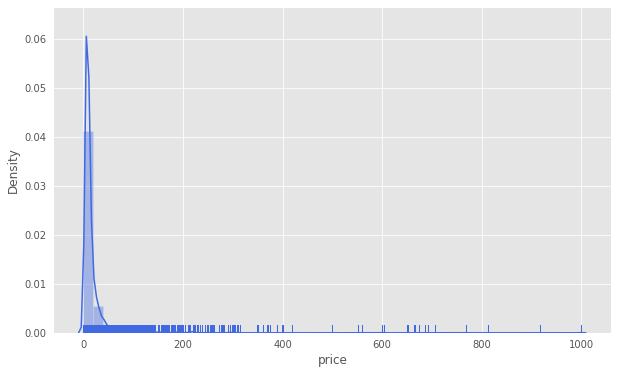

In [72]:
# Identifying the spread of TotalVisits Range
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style("dark")
plt.style.use("ggplot")
plt.figure(figsize=[10,6])
sns.distplot(merge_df['price'], rug = True, color = 'royalblue')
plt.show()

In [73]:
merge_df['price'].describe()

count    565449.000000
mean         18.612691
std          43.182930
min           0.010000
25%           6.980000
50%           9.950000
75%          15.990000
max         999.990000
Name: price, dtype: float64

In [74]:
merge_df['price'].mode()[0]

9.99

***Implemetation of Rule-**
Msising values filled by using the following rules:

If Mean ~ Median approximately, substitute by mean.

If Mean != median, substitute by median

but if there is a huge difference in mean and max, subsitute if by mode

In [75]:
# Imputing missing values of price with it's mode value

merge_df['price'].fillna(merge_df['price'].mode()[0], axis = 0, inplace = True)

In [76]:
# Checking missing values again: 

null_values(merge_df)

reviewText          0.07
also_buy            0.00
brand               0.00
also_view           0.00
main_cat            0.00
price               0.00
asin                0.00
overall             0.00
verified            0.00
reviewerID          0.00
reviewerName        0.00
review_sentiment    0.00
Date&Time           0.00
dtype: float64

In [77]:
# Extracting year and month and creating a new column for them 

merge_df['year'] = pd.to_datetime(merge_df['Date&Time']).dt.year
merge_df['month'] = pd.to_datetime(merge_df['Date&Time']).dt.month

In [78]:
merge_df.head()

also_buy    brand also_view                   main_cat  price        asin  \
0       []  ELEGANI        []  Cell Phones & Accessories   9.99  7508492919   
1       []  ELEGANI        []  Cell Phones & Accessories   9.99  7508492919   
2       []  ELEGANI        []  Cell Phones & Accessories   9.99  7508492919   
3       []  ELEGANI        []  Cell Phones & Accessories   9.99  7508492919   
4       []  ELEGANI        []  Cell Phones & Accessories   9.99  7508492919   

   overall  verified      reviewerID      reviewerName  \
0      5.0      True  A24E3SXTC62LJI  Claudia Valdivia   
1      5.0      True  A269FLZCB4GIPV       sarah ponce   
2      3.0      True   AB6CHQWHZW4TV               Kai   
3      2.0      True   A1M117A53LEI8   Sharon Williams   
4      4.0      True  A272DUT8M88ZS8   Bella Rodriguez   

                                          reviewText review_sentiment  \
0  Looks even better in person. Be careful to not...         POSITIVE   
1  When you don't want to spend a whole lot of ca...         POSITIVE   
2  so the case came on time, i love the design. I...         NEGATIVE   
3  DON'T CARE FOR IT.  GAVE IT AS A GIFT AND THEY...         POSITIVE   
4  I liked it because it was cute, but the studs ...         POSITIVE   

    Date&Time  year  month  
0  2014-08-03  2014      8  
1  2014-02-11  2014      2  
2  2014-02-07  2014      2  
3  2014-02-03  2014      2  
4  2014-02-02  2014      2

In [79]:
# Dropping Date&Time as we have month and year separately

merge_df.drop('Date&Time', axis = 1, inplace = True)

In [80]:
# Renaming overall to ratings 

merge_df.rename(columns={'overall': 'ratings'}, inplace=True)

In [81]:
# Checking the value counts of ratings and the succes of rename

merge_df.ratings.value_counts()

5.0    653888
4.0    171189
3.0     91538
1.0     75716
2.0     53186
Name: ratings, dtype: int64

In [82]:
# Checking the value counts of month

merge_df.month.value_counts()

1     99559
12    94207
7     91099
3     90669
8     89092
2     85964
10    84152
11    83690
4     83666
9     81924
6     80860
5     80635
Name: month, dtype: int64

In [83]:
# Checking the value counts of month

merge_df.year.value_counts()

2015    301321
2016    284239
2014    175422
2017    120583
2013     82339
2018     37964
2012     26693
2011      8603
2010      3218
2009      2261
2008      1607
2007       670
2006       329
2005       160
2004        72
2003        32
2002         4
Name: year, dtype: int64

**Understand the Numeric data and Categorical data for Analysis**

In [84]:
# Check the summary for the numeric columns 

merge_df.describe()

price       ratings          year         month
count  1.045517e+06  1.045517e+06  1.045517e+06  1.045517e+06
mean   1.465343e+01  4.218868e+00  2.015127e+03  6.453106e+00
std    3.204665e+01  1.233017e+00  1.487766e+00  3.512060e+00
min    1.000000e-02  1.000000e+00  2.002000e+03  1.000000e+00
25%    8.990000e+00  4.000000e+00  2.014000e+03  3.000000e+00
50%    9.990000e+00  5.000000e+00  2.015000e+03  7.000000e+00
75%    9.990000e+00  5.000000e+00  2.016000e+03  1.000000e+01
max    9.999900e+02  5.000000e+00  2.018000e+03  1.200000e+01

***Observations**-
As we have replaced almost 45% of the prices null values with the 9.99, that's become our avergae price for the products listed under cell phones and accessories. Also, there is a huge spread of data as the value of standard deviaton is more than mean.
Most of ratings given are positive i.e. 4 and 5
Highest number of reviews are received in 2015 and 2016.

In [85]:
# Checking the ratio of Actual Positive and Actual Neative labels under review_sentiment in the dataframe.

merge_df.review_sentiment.value_counts(normalize = True)*100

POSITIVE    78.406855
NEGATIVE    21.593145
Name: review_sentiment, dtype: float64

In [86]:
# Export the modified version of merge dataframe for Tableau demonstartion 

merge_df.to_csv('merge_df(modified).csv',index=False)

In [87]:
! ls

 drive	'merge_df(modified).csv'   sample_data


**Exploratory data analysis**

In [88]:
merge_df.head()

also_buy    brand also_view                   main_cat  price        asin  \
0       []  ELEGANI        []  Cell Phones & Accessories   9.99  7508492919   
1       []  ELEGANI        []  Cell Phones & Accessories   9.99  7508492919   
2       []  ELEGANI        []  Cell Phones & Accessories   9.99  7508492919   
3       []  ELEGANI        []  Cell Phones & Accessories   9.99  7508492919   
4       []  ELEGANI        []  Cell Phones & Accessories   9.99  7508492919   

   ratings  verified      reviewerID      reviewerName  \
0      5.0      True  A24E3SXTC62LJI  Claudia Valdivia   
1      5.0      True  A269FLZCB4GIPV       sarah ponce   
2      3.0      True   AB6CHQWHZW4TV               Kai   
3      2.0      True   A1M117A53LEI8   Sharon Williams   
4      4.0      True  A272DUT8M88ZS8   Bella Rodriguez   

                                          reviewText review_sentiment  year  \
0  Looks even better in person. Be careful to not...         POSITIVE  2014   
1  When you don't want to spend a whole lot of ca...         POSITIVE  2014   
2  so the case came on time, i love the design. I...         NEGATIVE  2014   
3  DON'T CARE FOR IT.  GAVE IT AS A GIFT AND THEY...         POSITIVE  2014   
4  I liked it because it was cute, but the studs ...         POSITIVE  2014   

   month  
0      8  
1      2  
2      2  
3      2  
4      2

**Obeservation:**

Using TextBlob to calculate sentiment polarity which lies in the range of [-1,1] where 1 means positive sentiment and -1 means a negative sentiment.

Creating new feature for the length of the review to review their distribution.

Creating new feature for the word count of the review to review their distribution.

In [89]:
# Creating a function to get the polarity of the sentiment in the range of -1 and 1

from textblob import TextBlob

def GetPolarity(text):
  try:
    return TextBlob(text).sentiment.polarity
  except: 
    return None
  
#Create a new columns ‘Polarity’ 
merge_df['polarity'] = merge_df['reviewText'].apply(GetPolarity)

In [90]:
# Creating a function to get the TB Scores. 

def GetTBScore(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'


#Create a new columns 'TB_analysis'

merge_df['TB_score'] = merge_df['polarity'].apply(GetTBScore)

In [91]:
# Creating review length and review word count column. 

merge_df['review_len'] = merge_df['reviewText'].astype(str).apply(len)
merge_df['word_count'] = merge_df['reviewText'].apply(lambda x: len(str(x).split()))

In [92]:
merge_df.head()

also_buy    brand also_view                   main_cat  price        asin  \
0       []  ELEGANI        []  Cell Phones & Accessories   9.99  7508492919   
1       []  ELEGANI        []  Cell Phones & Accessories   9.99  7508492919   
2       []  ELEGANI        []  Cell Phones & Accessories   9.99  7508492919   
3       []  ELEGANI        []  Cell Phones & Accessories   9.99  7508492919   
4       []  ELEGANI        []  Cell Phones & Accessories   9.99  7508492919   

   ratings  verified      reviewerID      reviewerName  \
0      5.0      True  A24E3SXTC62LJI  Claudia Valdivia   
1      5.0      True  A269FLZCB4GIPV       sarah ponce   
2      3.0      True   AB6CHQWHZW4TV               Kai   
3      2.0      True   A1M117A53LEI8   Sharon Williams   
4      4.0      True  A272DUT8M88ZS8   Bella Rodriguez   

                                          reviewText review_sentiment  year  \
0  Looks even better in person. Be careful to not...         POSITIVE  2014   
1  When you don't want to spend a whole lot of ca...         POSITIVE  2014   
2  so the case came on time, i love the design. I...         NEGATIVE  2014   
3  DON'T CARE FOR IT.  GAVE IT AS A GIFT AND THEY...         POSITIVE  2014   
4  I liked it because it was cute, but the studs ...         POSITIVE  2014   

   month  polarity  TB_score  review_len  word_count  
0      8  0.331250  Positive         271          49  
1      2  0.600000  Positive         102          22  
2      2 -0.004167  Negative         257          51  
3      2  0.200000  Positive          92          20  
4      2  0.511111  Positive         150          31

***Understand sentiment polarity work**

In [93]:
# Let's understand how the sentiment polarity score works, for that we randomly select 5 reviews with the highest sentiment polarity score (1):

print('5 random reviews with the highest positive sentiment polarity: \n')
cl = merge_df.loc[merge_df.polarity == 1, ['reviewText']].sample(5).values
for c in cl:
    print(c[0])

5 random reviews with the highest positive sentiment polarity: 

Excellent Item!!
Excellent
it's Good!!!
I've had this thing for years, best darn cell phone car charger I've ever owned.
Excellent


In [94]:
# Let's understand how the sentiment polarity score works, for that we randomly select 5 reviews with the most neutral sentiment polarity score (zero):

print('5 random reviews with the most neutral sentiment(zero) polarity: \n')
cl = merge_df.loc[merge_df.polarity == 0, ['reviewText']].sample(5).values
for c in cl:
    print(c[0])

5 random reviews with the most neutral sentiment(zero) polarity: 

goid
Junk
It turned out to be a  defective phone sold out
Goegeous color
perfecto


In [95]:
merge_df.polarity.min()

-1.0

In [96]:
merge_df.loc[merge_df.polarity == -1.0]

also_buy  \
2408                                          [B004CU1VW0]   
3915                                                    []   
4246                                                    []   
5955                                                    []   
12410    [B003MB67OW, B000SCGYKK, B00BRE46X0, B01AQ3N44...   
12456    [B003MB67OW, B000SCGYKK, B00BRE46X0, B01AQ3N44...   
12710    [B004RZIRYU, B07GC2K4KB, B00BHHDOG2, B00QGG95B...   
12744    [B004RZIRYU, B07GC2K4KB, B00BHHDOG2, B00QGG95B...   
13878                                                   []   
14709                                                   []   
16045                 [B00JAY397S, B000BUN79K, B0118QGCRO]   
17180                                                   []   
18307                                                   []   
19505                                                   []   
20350                                                   []   
21393     [B004J016NC, B002B3Y6YU, B005HGKDCM, B00J1SMJ06]   
24285                                                   []   
25068                                                   []   
26239                                                   []   
27160                                                   []   
31017                             [B002HU39BS, B0134V3VZM]   
33963                                                   []   
33984                                                   []   
34528                                                   []   
34531                                                   []   
39182                             [B004B9QNJS, B00404XAOU]   
42521                                                   []   
45395                                                   []   
46447                                                   []   
48926                                         [B00IVRS7NG]   
51413                                                   []   
51561                                                   []   
52610                                                   []   
52814                                                   []   
55209    [B00UMNJPWO, B07JPJ9L14, B07FFVWH97, B07CTX3KW...   
55243    [B00UMNJPWO, B07JPJ9L14, B07FFVWH97, B07CTX3KW...   
55387    [B00UMNJPWO, B07JPJ9L14, B07FFVWH97, B07CTX3KW...   
57130                                         [B006H5PZ7K]   
57160                                         [B006H5PZ7K]   
57808                             [B00CO3HBK8, B00K8CIY1W]   
59253                                                   []   
61411                                                   []   
61758                                                   []   
62434    [B006GF5U8A, B0713WJG6H, B009E87SD6, B006HZLJN...   
62773                                                   []   
63639    [B003R15QEE, B003RDV0VU, B00OSB9C2Y, B01B3LB4C...   
63727                                                   []   
63913                                                   []   
66136                                                   []   
67353                                                   []   
68717                                                   []   
69101                                                   []   
69750    [1598568612, 1934770981, 1609365739, 031082180...   
75425                                                   []   
75478                                                   []   
75816                                                   []   
76121                                         [B00J3OF5H2]   
76201                                                   []   
78712                                                   []   
81906    [B0042FV2SI, B006H5PZ7K, B00FAMF5SA, B01JOF7YD...   
85085                                                   []   
88196    [B012V1HEP4, B07BDR5PDW, B01CD5VC92, B01ER2SMH...   
88304                                                   []   
89926                 [B00HWHTJQA, B00AIAL7GS, B00AB2NW66]   
92256               

In [97]:
# Then randomly select 5 reviews with the most negative sentiment polarity score (zero):


print('5 reviews with the most negative polarity: \n')
cl = merge_df.loc[merge_df.polarity == -1.0, ['reviewText']].sample(5).values
for c in cl:
    print(c[0])

5 reviews with the most negative polarity: 

Horrible
This has no instructions, or power cord. Worst of all it doesn't work.
Terrible.
This is worst case ever
Worst quality


**Applying Univariate Analysis**

In [98]:
#Import all neccesary libraries 
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
import plotly.graph_objs as go
#import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.express as px
from plotly.offline import iplot
import cufflinks as cf
cf.go_offline()
cf.set_config_file(world_readable=True, theme='pearl', offline=False)

%matplotlib inline

In [99]:
merge_df.head()

also_buy    brand also_view                   main_cat  price        asin  \
0       []  ELEGANI        []  Cell Phones & Accessories   9.99  7508492919   
1       []  ELEGANI        []  Cell Phones & Accessories   9.99  7508492919   
2       []  ELEGANI        []  Cell Phones & Accessories   9.99  7508492919   
3       []  ELEGANI        []  Cell Phones & Accessories   9.99  7508492919   
4       []  ELEGANI        []  Cell Phones & Accessories   9.99  7508492919   

   ratings  verified      reviewerID      reviewerName  \
0      5.0      True  A24E3SXTC62LJI  Claudia Valdivia   
1      5.0      True  A269FLZCB4GIPV       sarah ponce   
2      3.0      True   AB6CHQWHZW4TV               Kai   
3      2.0      True   A1M117A53LEI8   Sharon Williams   
4      4.0      True  A272DUT8M88ZS8   Bella Rodriguez   

                                          reviewText review_sentiment  year  \
0  Looks even better in person. Be careful to not...         POSITIVE  2014   
1  When you don't want to spend a whole lot of ca...         POSITIVE  2014   
2  so the case came on time, i love the design. I...         NEGATIVE  2014   
3  DON'T CARE FOR IT.  GAVE IT AS A GIFT AND THEY...         POSITIVE  2014   
4  I liked it because it was cute, but the studs ...         POSITIVE  2014   

   month  polarity  TB_score  review_len  word_count  
0      8  0.331250  Positive         271          49  
1      2  0.600000  Positive         102          22  
2      2 -0.004167  Negative         257          51  
3      2  0.200000  Positive          92          20  
4      2  0.511111  Positive         150          31

***Sentiment Polarity distribution**

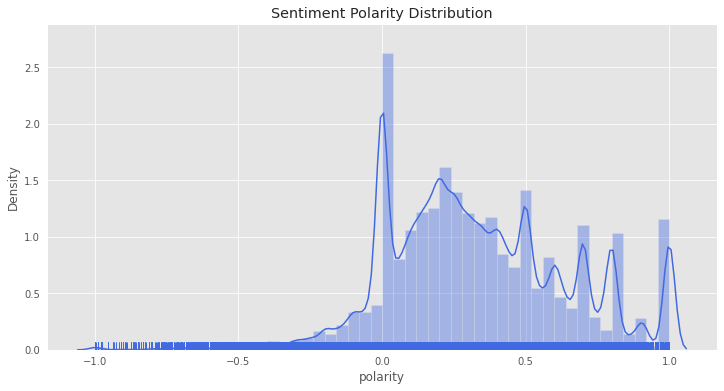

In [100]:
 #Review Sentiment Polarity distribution 

sns.set_style("dark")
plt.style.use("ggplot")
plt.figure(figsize=[12,6])
sns.distplot(merge_df['polarity'], rug = True, color = 'royalblue').set_title('Sentiment Polarity Distribution')
plt.show()

**Observation-**

Majority of the sentiment polarity scores are greater than zero, It means most of them are pretty positive.

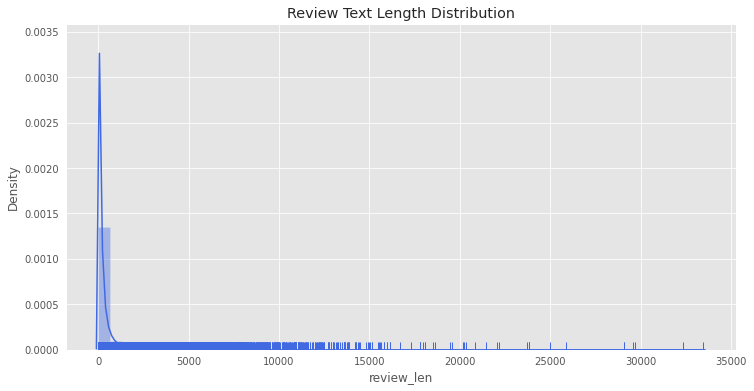

In [101]:
# Review Text Length distribution 

sns.set_style("dark")
plt.style.use("ggplot")
plt.figure(figsize=[12,6])
sns.distplot(merge_df['review_len'], rug = True, color = 'royalblue').set_title('Review Text Length Distribution')
plt.show()

**Observation-**
The length of the review text is between 500 to 1000 approx.

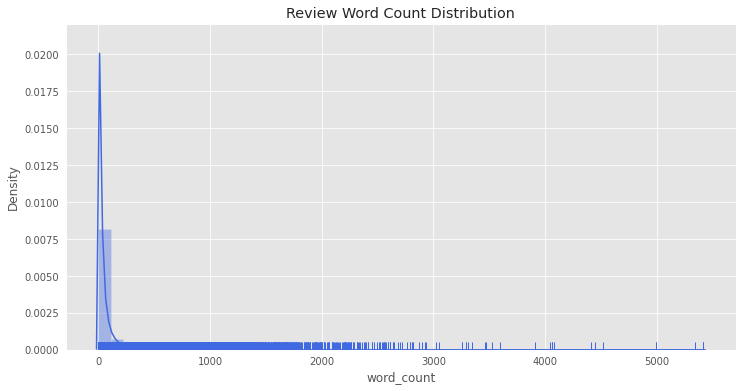

In [102]:
# Review Word Count Distribution 

sns.set_style("dark")
plt.style.use("ggplot")
plt.figure(figsize=[12,6])
sns.distplot(merge_df['word_count'], rug = True, color = 'royalblue').set_title('Review Word Count Distribution')
plt.show()

**Observation-**
Each review contain a word count of 50 to 200 words approx.

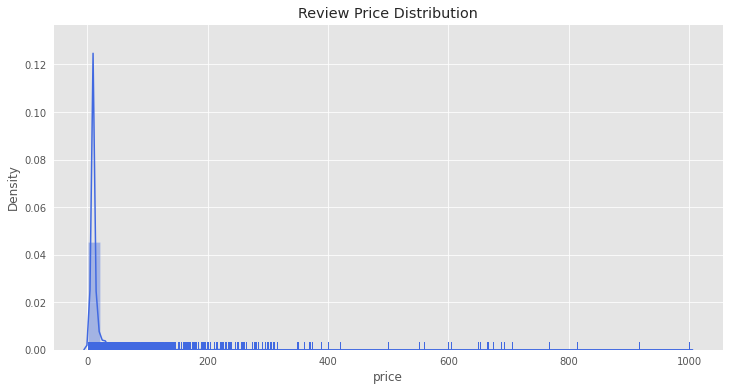

In [103]:
# Review Price Distribution 

sns.set_style("dark")
plt.style.use("ggplot")
plt.figure(figsize=[12,6])
sns.distplot(merge_df['price'], rug = True, color = 'royalblue').set_title('Review Price Distribution')
plt.show()

**Observation-**
Majority of the products i.e. cell phones and accessories listed are on between 10 to 150 dollars approx.

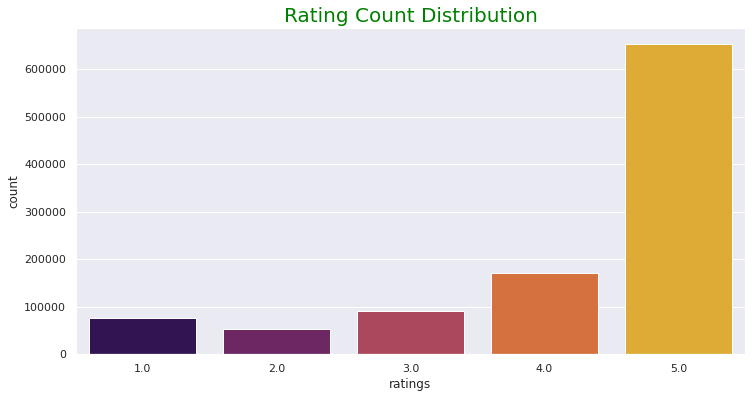

In [104]:
# Review Rating Count Distribution 

sns.set_theme(style="darkgrid")
plt.figure(figsize=[12,6])
sns.countplot(merge_df['ratings'], palette = 'inferno')
plt.title('Rating Count Distribution', fontdict={'fontsize': 20, 'fontweight': 5, 'color': 'Green'})
plt.show()

**Observation-**
Majority of the products have recieved positive ratings , 5 is the highest and 4 is the second highest.

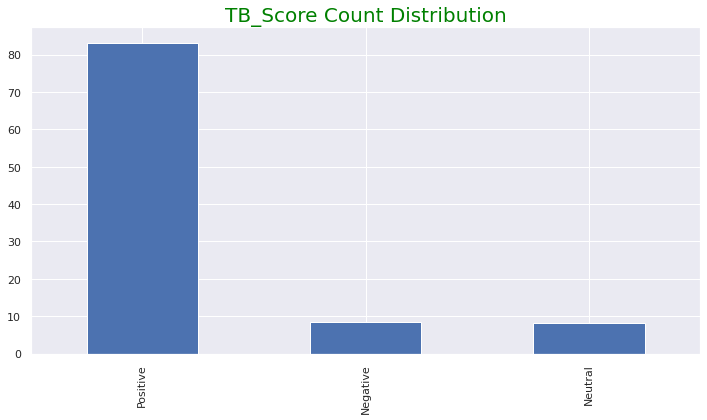

In [105]:
# Review TB_Score count percentage wise

plt.figure(figsize=[12,6])
(merge_df.TB_score.value_counts(normalize = True)*100)[:10].plot.bar()
plt.title('TB_Score Count Distribution', fontdict={'fontsize': 20, 'fontweight': 5, 'color': 'Green'})
plt.show()

**Observation-**
Likewise most of the reviews are in positive category.

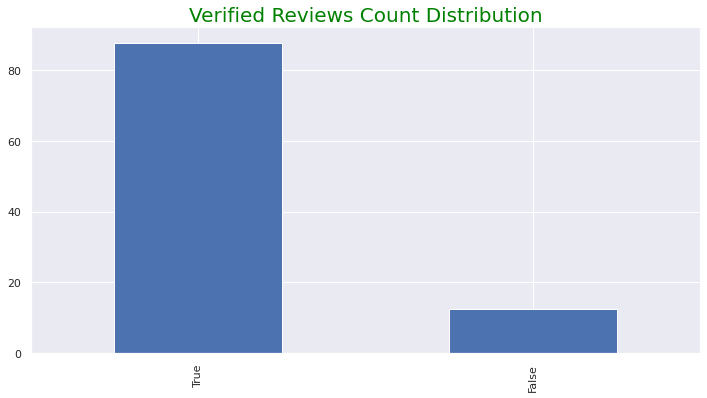

In [106]:
# Review verified reviews percentage wise

plt.figure(figsize=[12,6])
(merge_df.verified.value_counts(normalize = True)*100)[:10].plot.bar()
plt.title('Verified Reviews Count Distribution', fontdict={'fontsize': 20, 'fontweight': 5, 'color': 'Green'})
plt.show()

**Observation-**
Total reviewd recieved on the website, more than 80* of them are verified on the website.

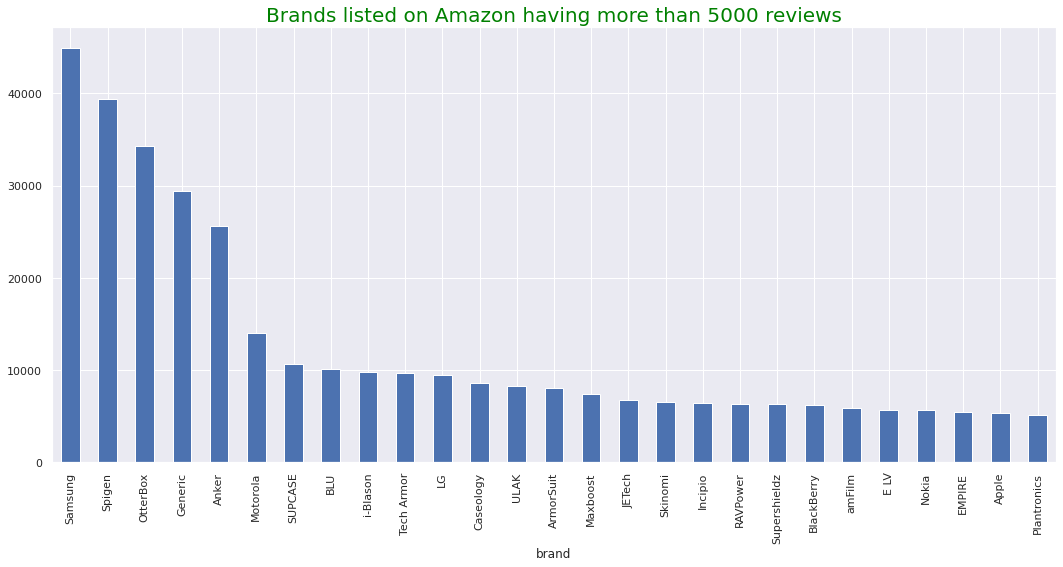

In [107]:
# Distribution of brands listed on Amazon having more than 5000 reviews

plt.figure(figsize=[18,8])
brand_counts = merge_df.groupby('brand').count()['reviewerID'].sort_values(ascending=False)
brand_counts[brand_counts > 5000].plot.bar()
plt.title('Brands listed on Amazon having more than 5000 reviews', fontdict={'fontsize': 20, 'fontweight': 5, 'color': 'Green'})
plt.show()

**Observation-**
Samsung, Spigen, OtterBox, Generic, Anker and Motorola are the high brands on the website in terms of reviews.

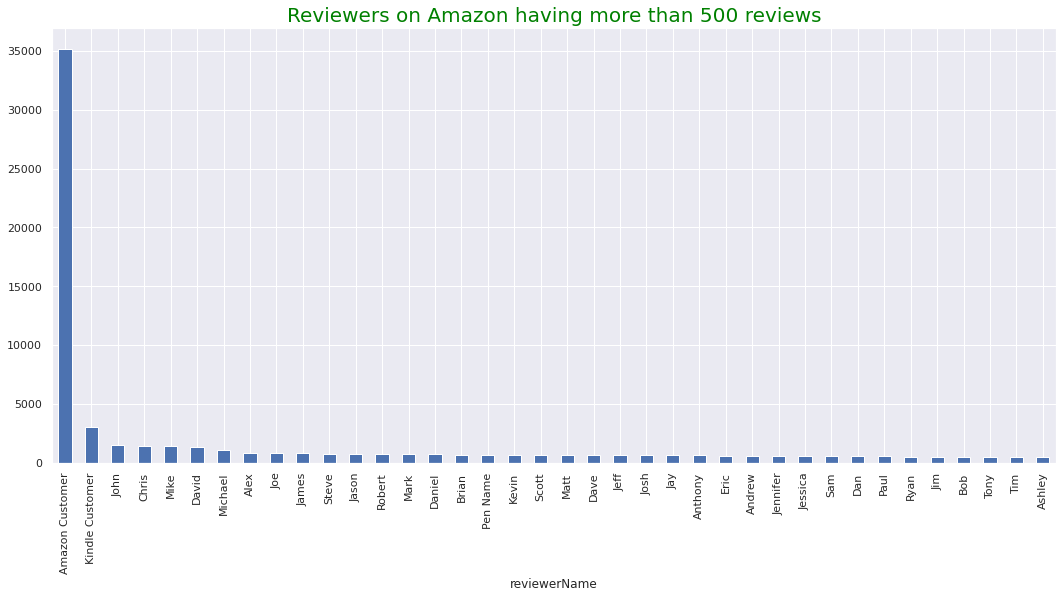

In [108]:
# Distribution of reviewers on Amazon having more than 500 reviews 

plt.figure(figsize=[18,8])
reviewer_count = merge_df.groupby('reviewerName').count()['reviewerID'].sort_values(ascending=False)
reviewer_count[reviewer_count > 500].plot.bar()
plt.title('Reviewers on Amazon having more than 500 reviews', fontdict={'fontsize': 20, 'fontweight': 5, 'color': 'Green'})
plt.show()

**Observation-**
Apart from first two, are the reviewers with most review on the website.

**Treating the Stop words on data set.**

In [109]:
stop_words = [line.rstrip('\n') for line in open('/content/drive/MyDrive/Colab Notebooks/Web_and_social_media_analytics/stop_words_long.txt')]

the 2837750
it 1694863
and 1474004
to 1287563
is 918685
this 835847
my 742303
for 710246
phone 670016
of 668660
case 609319
on 529213
that 528426
in 520079
with 492427
but 430203
you 426257
not 411769
have 377421
was 325305


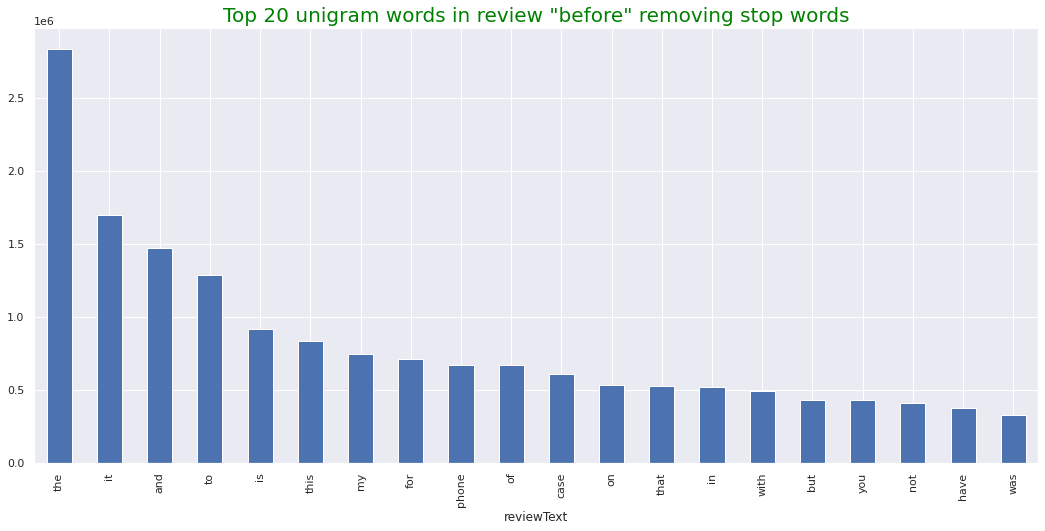

In [110]:
# Top 20 unigrams distribution "before" removing stop words

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

pd.set_option('max_colwidth', 100)

def get_top_n_words(corpus, n=None):
  vec = CountVectorizer().fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis=0) 
  words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
  return words_freq[:n]
common_words = get_top_n_words(merge_df['reviewText'].astype('U').values, 20)
for word, freq in common_words:
  print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['reviewText' , 'count'])
plt.figure(figsize=[18,8])
df1.groupby('reviewText').sum()['count'].sort_values(ascending=False).plot.bar()
plt.title('Top 20 unigram words in review "before" removing stop words', fontdict={'fontsize': 20, 'fontweight': 5, 'color': 'Green'})
plt.show()

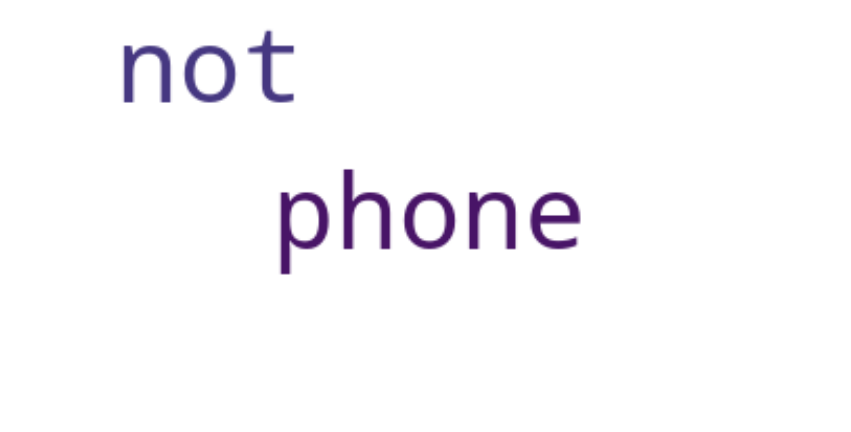

In [111]:
from wordcloud import WordCloud

text = " ".join(review for review in df1.reviewText)


wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords=stop_words).generate(text)
plt.figure(figsize=[15,10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show();

phone 670016
case 609319
great 304849
screen 250315
good 239673
like 227181
just 182254
product 179609
use 165352
love 135928
works 130003
nice 124450
really 121383
iphone 120527
protector 116417
battery 112485
charge 106192
does 105446
fit 105378
time 105058


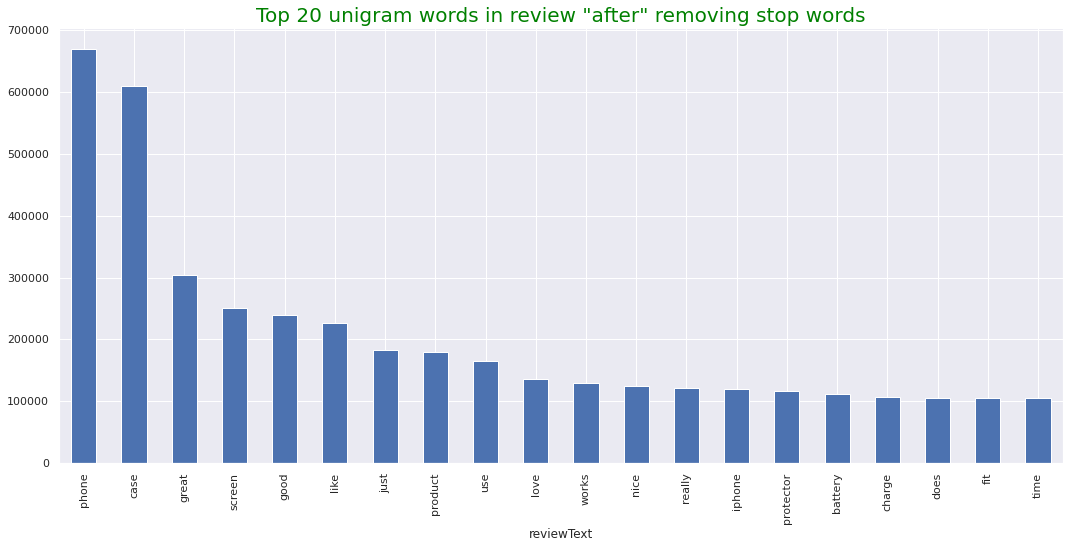

In [112]:
# Top 20 unigrams distribution "after" removing stop words

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(merge_df['reviewText'].apply(lambda x: np.str_(x)), 20)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['reviewText' , 'count'])
plt.figure(figsize=[18,8])
df1.groupby('reviewText').sum()['count'].sort_values(ascending=False).plot.bar()
plt.title('Top 20 unigram words in review "after" removing stop words', fontdict={'fontsize': 20, 'fontweight': 5, 'color': 'Green'})
plt.show()

**Observation-** As we can see phone, case, great ,good, like are top in 20 words after removing stops words.

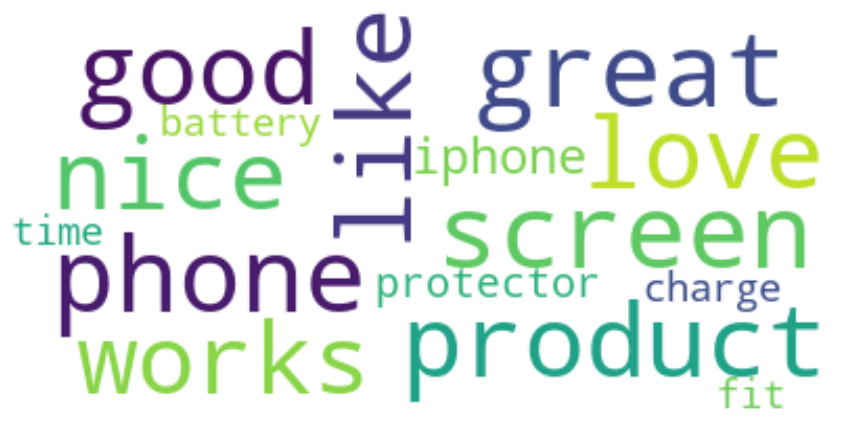

In [113]:
from wordcloud import WordCloud

text = " ".join(review for review in df1.reviewText)


wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords=stop_words).generate(text)
plt.figure(figsize=[15,10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show();

**Observation-**
Ignoring stopwords using Countvector function help us identify the single words for our analysis.

the phone 225431
of the 209247
on the 164581
the case 156248
my phone 150240
it is 148639
this case 137482
in the 124266
for the 121788
this is 116948
and the 109934
and it 108450
with the 104141
for my 95523
to the 94894
if you 94280
the screen 87779
screen protector 84057
it was 75164
easy to 70398


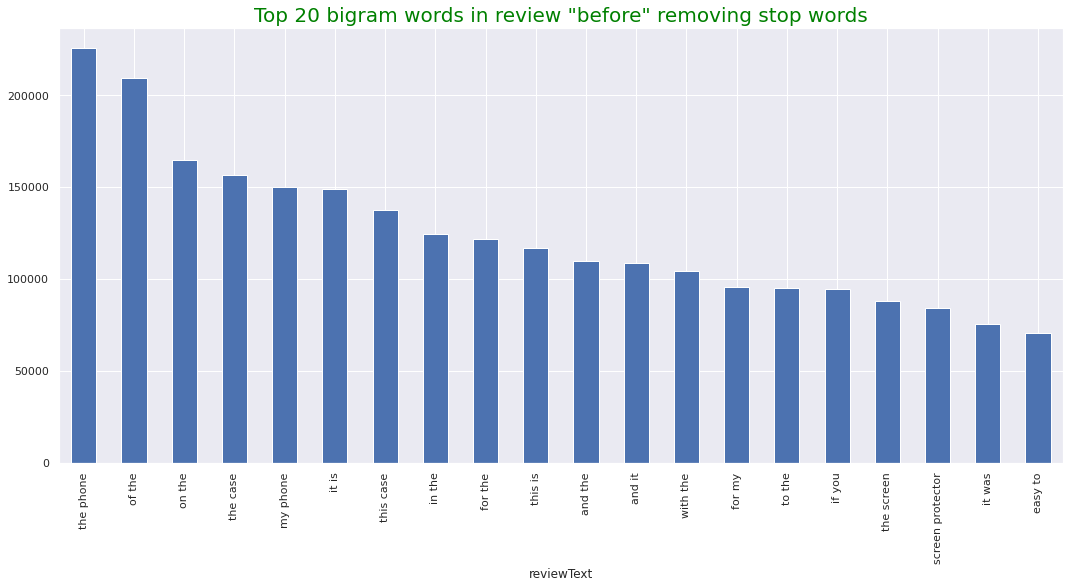

In [114]:
# Top 20 bigrams distribution "before" removing stop words

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(merge_df['reviewText'].apply(lambda x: np.str_(x)), 20)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['reviewText' , 'count'])
plt.figure(figsize=[18,8])
df1.groupby('reviewText').sum()['count'].sort_values(ascending=False).plot.bar()
plt.title('Top 20 bigram words in review "before" removing stop words', fontdict={'fontsize': 20, 'fontweight': 5, 'color': 'Green'})
plt.show()

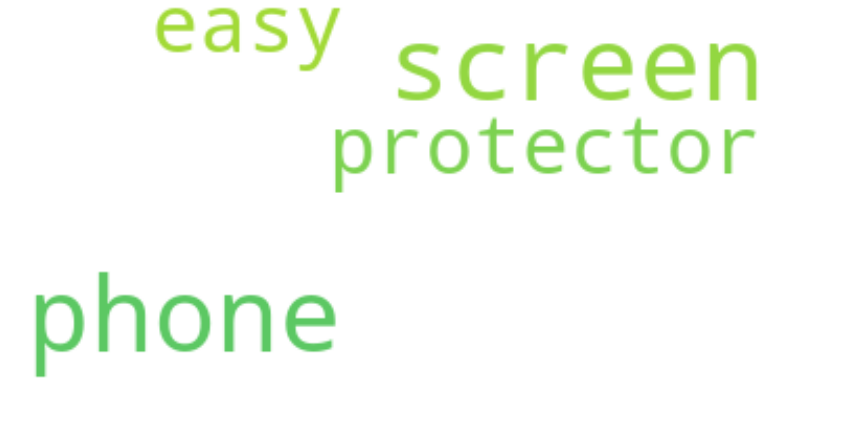

In [115]:
from wordcloud import WordCloud

text = " ".join(review for review in df1.reviewText)


wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords=stop_words).generate(text)
plt.figure(figsize=[15,10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show();

screen protector 84730
phone case 36728
works great 35272
great product 25349
great case 21982
screen protectors 21856
love case 17672
samsung galaxy 17427
highly recommend 16376
case fits 15143
case phone 15011
good quality 14771
glass screen 14695
dropped phone 14656
cell phone 14483
really like 14383
protect phone 14270
battery life 14153
tempered glass 13569
easy install 13261


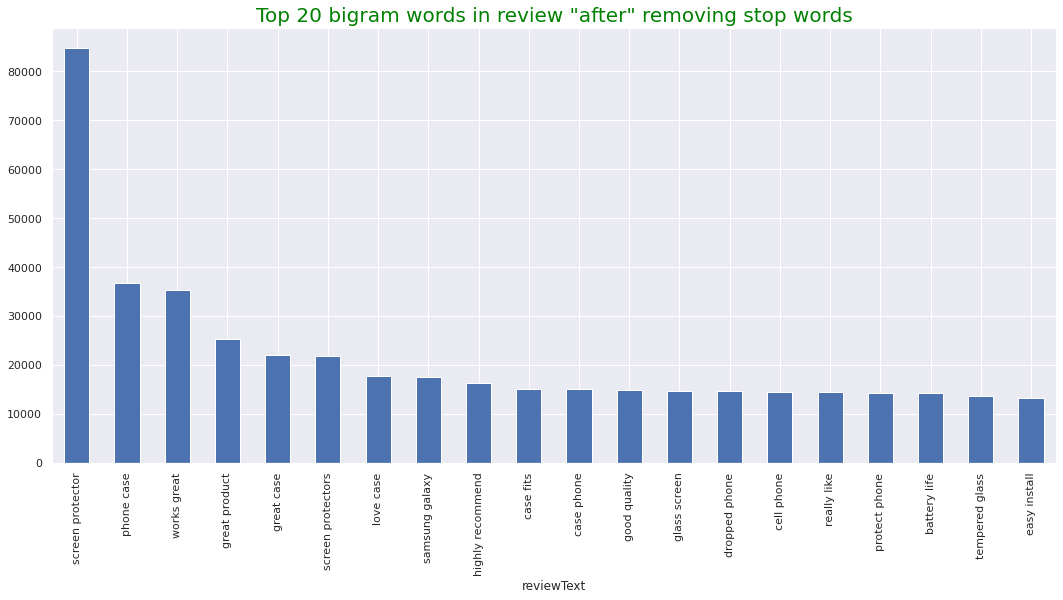

In [116]:
# Top 20 bigrams distribution "after" removing stop words

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(merge_df['reviewText'].apply(lambda x: np.str_(x)), 20)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['reviewText' , 'count'])
plt.figure(figsize=[18,8])
df1.groupby('reviewText').sum()['count'].sort_values(ascending=False).plot.bar()
plt.title('Top 20 bigram words in review "after" removing stop words', fontdict={'fontsize': 20, 'fontweight': 5, 'color': 'Green'})
plt.show()

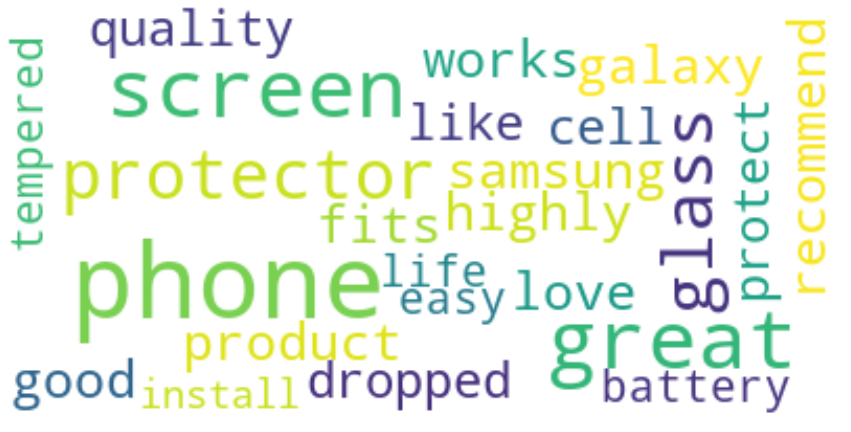

In [117]:
from wordcloud import WordCloud

text = " ".join(review for review in df1.reviewText)


wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords=stop_words).generate(text)
plt.figure(figsize=[15,10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show();

**Observation-**
Ignoring stopwords using Countvector function help us identify the double words for our analysis.

**Applying Bi / Multivariate Analysis**

In [118]:
merge_df.head()

also_buy    brand also_view                   main_cat  price        asin  \
0       []  ELEGANI        []  Cell Phones & Accessories   9.99  7508492919   
1       []  ELEGANI        []  Cell Phones & Accessories   9.99  7508492919   
2       []  ELEGANI        []  Cell Phones & Accessories   9.99  7508492919   
3       []  ELEGANI        []  Cell Phones & Accessories   9.99  7508492919   
4       []  ELEGANI        []  Cell Phones & Accessories   9.99  7508492919   

   ratings  verified      reviewerID      reviewerName  \
0      5.0      True  A24E3SXTC62LJI  Claudia Valdivia   
1      5.0      True  A269FLZCB4GIPV       sarah ponce   
2      3.0      True   AB6CHQWHZW4TV               Kai   
3      2.0      True   A1M117A53LEI8   Sharon Williams   
4      4.0      True  A272DUT8M88ZS8   Bella Rodriguez   

                                                                                            reviewText  \
0  Looks even better in person. Be careful to not drop your phone so often because the rhinestones ...   
1  When you don't want to spend a whole lot of cash but want a great deal...this is the shop to buy...   
2  so the case came on time, i love the design. I'm actually missing 2 studs but nothing too notice...   
3         DON'T CARE FOR IT.  GAVE IT AS A GIFT AND THEY WERE OKAY WITH IT.  JUST NOT WHAT I EXPECTED.   
4  I liked it because it was cute, but the studs fall off easily and to protect a phone this would ...   

  review_sentiment  year  month  polarity  TB_score  review_len  word_count  
0         POSITIVE  2014      8  0.331250  Positive         271          49  
1         POSITIVE  2014      2  0.600000  Positive         102          22  
2         NEGATIVE  2014      2 -0.004167  Negative         257          51  
3         POSITIVE  2014      2  0.200000  Positive          92          20  
4         POSITIVE  2014      2  0.511111  Positive         150          31

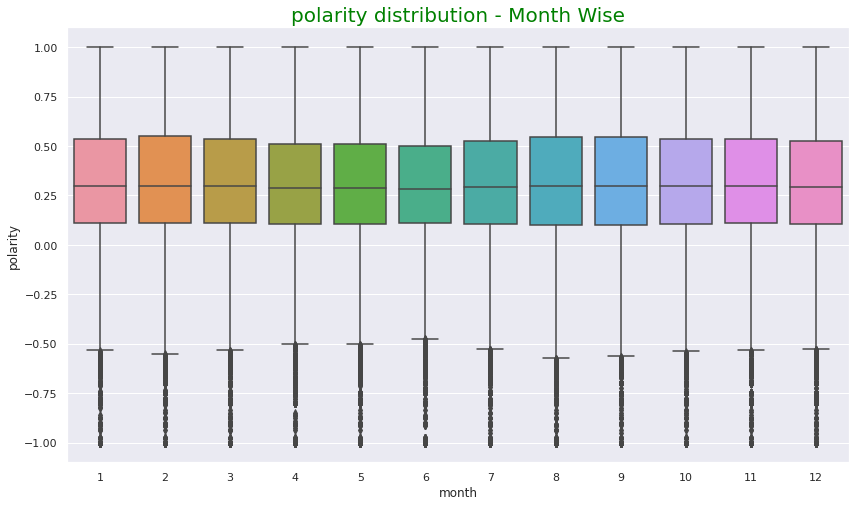

In [119]:
# Polarity Distribution Month Wise

plt.figure(figsize=[14,8])
sns.boxplot(data = merge_df, orient='v', x = 'month', y='polarity')
plt.title("polarity distribution - Month Wise", fontdict={'fontsize' : 20, 'fontweight' : 5, 'color': 'Green'})
plt.show()

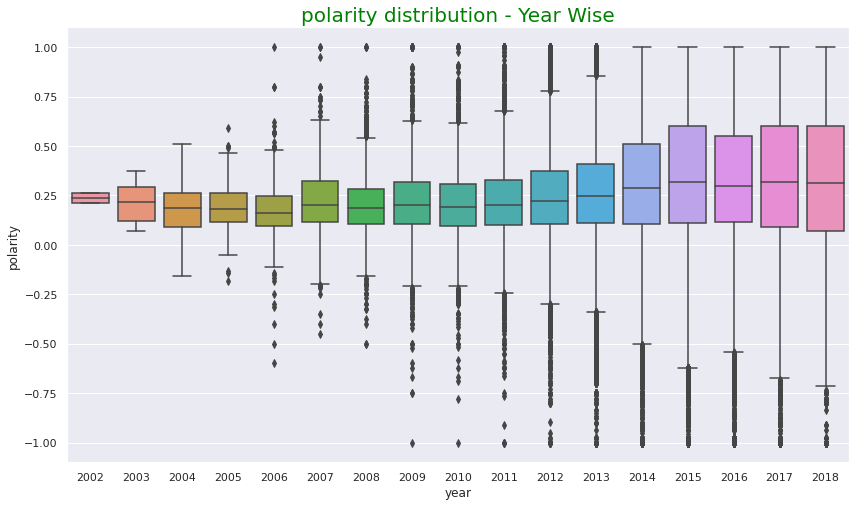

In [120]:
# Polarity Distribution Year Wise

plt.figure(figsize=[14,8])
sns.boxplot(data= merge_df, orient='v', x = 'year', y='polarity')
plt.title("polarity distribution - Year Wise", fontdict={'fontsize' : 20, 'fontweight' : 5, 'color': 'Green'})
plt.show()

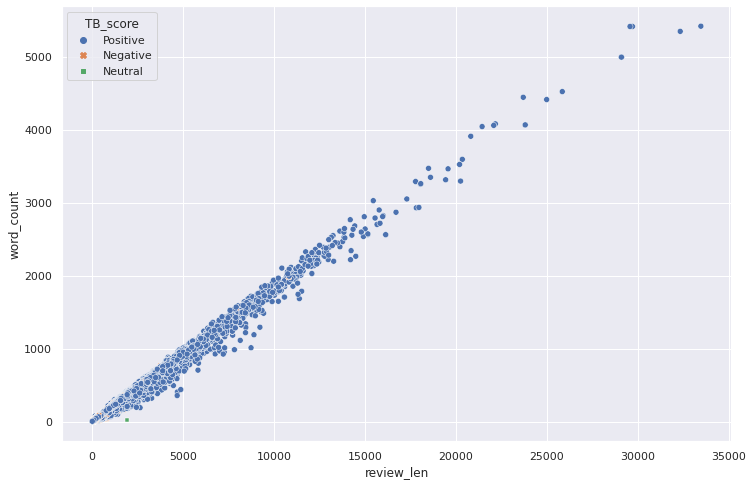

In [121]:
# Relationship between review Length and Word count in a review
plt.figure(figsize=[12,8])
sns.scatterplot(data=merge_df, x="review_len", y="word_count", hue="TB_score", style="TB_score")
plt.show()

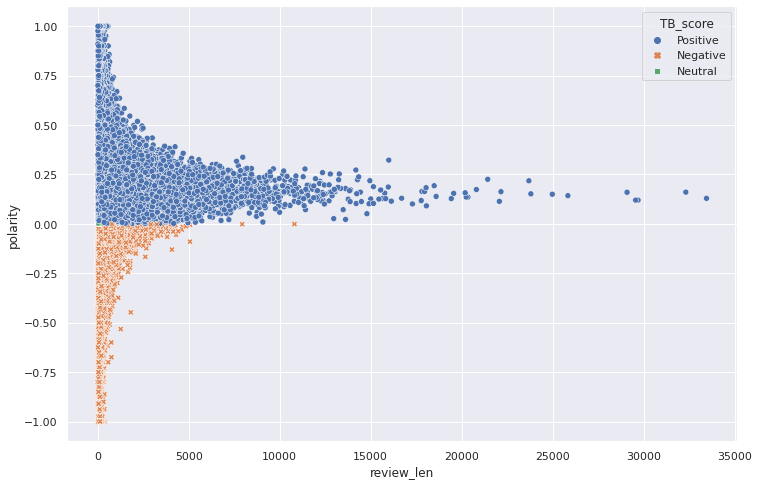

In [122]:
# Relationship between review Length and polarity in a review

plt.figure(figsize=[12,8])
sns.scatterplot(data=merge_df, x="review_len", y="polarity", hue="TB_score", style="TB_score")
plt.show()

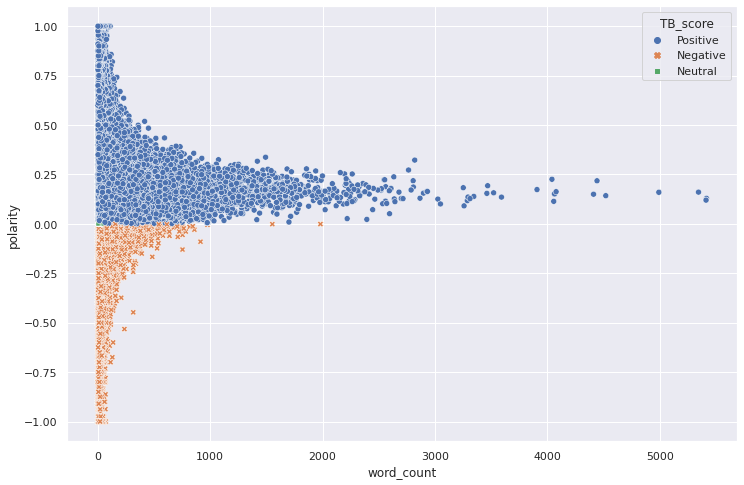

In [123]:
# Relationship between word_count and polarity in a review

plt.figure(figsize=[12,8])
sns.scatterplot(data=merge_df, x="word_count", y="polarity", hue="TB_score", style="TB_score")
plt.show()

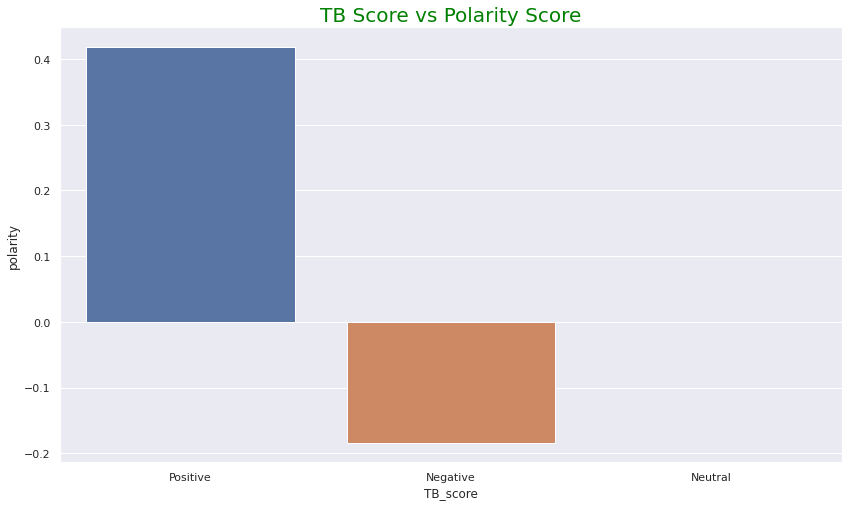

In [124]:
plt.figure(figsize=[14,8])
sns.barplot(x=merge_df['TB_score'] , y=merge_df['polarity'], ci=None)
plt.title("TB Score vs Polarity Score", fontdict={'fontsize': 20, 'fontweight': 5, 'color': 'Green'})
plt.show()

**Observation-**
There is not much of the insights gathered with Bi/multi variate analysis. Yes we agree gradually with time, the cell phone categories have made a huge impact as more amount of Positive reviews are recieved. Also, we understood that the word count in a review and the review lenght is correlated.

**Applying Text Analytics**

In [125]:
# Reading stop words from a text file in to a list
stop_words = [line.rstrip('\n') for line in open('/content/drive/MyDrive/Colab Notebooks/Web_and_social_media_analytics/stop_words_long.txt')]

In [126]:
print(stop_words)

['a', 'about', 'above', 'across', 'after', 'again', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'among', 'an', 'and', 'another', 'any', 'anybody', 'anyone', 'anything', 'anywhere', 'are', 'area', 'areas', 'around', 'as', 'ask', 'asked', 'asking', 'asks', 'at', 'away', 'b', 'back', 'backed', 'backing', 'backs', 'be', 'became', 'because', 'become', 'becomes', 'been', 'before', 'began', 'behind', 'being', 'beings', 'between', 'big', 'both', 'but', 'by', 'c', 'came', 'can', 'case', 'cases', 'certain', 'certainly', 'come', 'could', 'd', 'did', 'differ', 'different', 'differently', 'do', 'does', 'done', 'down', 'down', 'downed', 'downing', 'downs', 'during', 'e', 'each', 'early', 'either', 'end', 'ended', 'ending', 'ends', 'even', 'ever', 'every', 'everybody', 'everyone', 'everything', 'everywhere', 'f', 'face', 'faces', 'fact', 'facts', 'far', 'felt', 'few', 'find', 'finds', 'first', 'for', 'four', 'from', 'full', 'fully', 'further', 'furthered', 'furthering'

In [127]:
merge_df.head()

also_buy    brand also_view                   main_cat  price        asin  \
0       []  ELEGANI        []  Cell Phones & Accessories   9.99  7508492919   
1       []  ELEGANI        []  Cell Phones & Accessories   9.99  7508492919   
2       []  ELEGANI        []  Cell Phones & Accessories   9.99  7508492919   
3       []  ELEGANI        []  Cell Phones & Accessories   9.99  7508492919   
4       []  ELEGANI        []  Cell Phones & Accessories   9.99  7508492919   

   ratings  verified      reviewerID      reviewerName  \
0      5.0      True  A24E3SXTC62LJI  Claudia Valdivia   
1      5.0      True  A269FLZCB4GIPV       sarah ponce   
2      3.0      True   AB6CHQWHZW4TV               Kai   
3      2.0      True   A1M117A53LEI8   Sharon Williams   
4      4.0      True  A272DUT8M88ZS8   Bella Rodriguez   

                                                                                            reviewText  \
0  Looks even better in person. Be careful to not drop your phone so often because the rhinestones ...   
1  When you don't want to spend a whole lot of cash but want a great deal...this is the shop to buy...   
2  so the case came on time, i love the design. I'm actually missing 2 studs but nothing too notice...   
3         DON'T CARE FOR IT.  GAVE IT AS A GIFT AND THEY WERE OKAY WITH IT.  JUST NOT WHAT I EXPECTED.   
4  I liked it because it was cute, but the studs fall off easily and to protect a phone this would ...   

  review_sentiment  year  month  polarity  TB_score  review_len  word_count  
0         POSITIVE  2014      8  0.331250  Positive         271          49  
1         POSITIVE  2014      2  0.600000  Positive         102          22  
2         NEGATIVE  2014      2 -0.004167  Negative         257          51  
3         POSITIVE  2014      2  0.200000  Positive          92          20  
4         POSITIVE  2014      2  0.511111  Positive         150          31

In [128]:
merge_df["review_sentiment"].value_counts(normalize = True)*100

POSITIVE    78.406855
NEGATIVE    21.593145
Name: review_sentiment, dtype: float64

In [129]:
merge_df["TB_score"].value_counts(normalize = True)*100

Positive    83.150059
Negative     8.544098
Neutral      8.305843
Name: TB_score, dtype: float64

In [130]:
# Dataframe to proceed with Text Analystics 
df_text = merge_df[["reviewText", "review_sentiment"]]
df_text.head()

reviewText  \
0  Looks even better in person. Be careful to not drop your phone so often because the rhinestones ...   
1  When you don't want to spend a whole lot of cash but want a great deal...this is the shop to buy...   
2  so the case came on time, i love the design. I'm actually missing 2 studs but nothing too notice...   
3         DON'T CARE FOR IT.  GAVE IT AS A GIFT AND THEY WERE OKAY WITH IT.  JUST NOT WHAT I EXPECTED.   
4  I liked it because it was cute, but the studs fall off easily and to protect a phone this would ...   

  review_sentiment  
0         POSITIVE  
1         POSITIVE  
2         NEGATIVE  
3         POSITIVE  
4         POSITIVE

In [131]:
df_text.shape

(1045517, 2)

**Applying Bag of words model**

Subsetting the dataset

Plotting word frequencies and removing stopwords

Tokenisation

Stemming

Lemmatization

In [132]:
#Let's take a subset of data (first 50 rows only) and create bag of word model on that. The objective is to undertsand the Text using CountVector.
text = df_text.iloc[0:50,:]
print(text)

                                                                                             reviewText  \
0   Looks even better in person. Be careful to not drop your phone so often because the rhinestones ...   
1   When you don't want to spend a whole lot of cash but want a great deal...this is the shop to buy...   
2   so the case came on time, i love the design. I'm actually missing 2 studs but nothing too notice...   
3          DON'T CARE FOR IT.  GAVE IT AS A GIFT AND THEY WERE OKAY WITH IT.  JUST NOT WHAT I EXPECTED.   
4   I liked it because it was cute, but the studs fall off easily and to protect a phone this would ...   
5   The product looked exactly like the picture and it was very nice. However only days later it fel...   
6   I FINALLY got my case today. It took forever to get here! It's cute and looks just like the pic....   
7   It is a very cute case. None of the jewels have fallen off and the bow is glued on very well. Ca...   
8   DO NOT BUY! this item is seriousl

In [133]:
# extract the reviews from the dataframe
reviewTexts = text.reviewText
print(reviewTexts)

0     Looks even better in person. Be careful to not drop your phone so often because the rhinestones ...
1     When you don't want to spend a whole lot of cash but want a great deal...this is the shop to buy...
2     so the case came on time, i love the design. I'm actually missing 2 studs but nothing too notice...
3            DON'T CARE FOR IT.  GAVE IT AS A GIFT AND THEY WERE OKAY WITH IT.  JUST NOT WHAT I EXPECTED.
4     I liked it because it was cute, but the studs fall off easily and to protect a phone this would ...
5     The product looked exactly like the picture and it was very nice. However only days later it fel...
6     I FINALLY got my case today. It took forever to get here! It's cute and looks just like the pic....
7     It is a very cute case. None of the jewels have fallen off and the bow is glued on very well. Ca...
8     DO NOT BUY! this item is seriously cheap as heck. not worth buying it at all. I didn't even get ...
9     I really love this case... you have to k

In [134]:
reviewTexts.shape

(50,)

In [135]:
# convert reviewTexts into list
reviewTexts = [review for review in reviewTexts]
print(reviewTexts)

['Looks even better in person. Be careful to not drop your phone so often because the rhinestones will fall off (duh). More of a decorative case than it is protective, but I will say that it fits perfectly and securely on my phone. Overall, very pleased with this purchase.', "When you don't want to spend a whole lot of cash but want a great deal...this is the shop to buy from!", "so the case came on time, i love the design. I'm actually missing 2 studs but nothing too noticeable the studding is almost a bit sloppy around the bow, but once again not too noticeable. I haven't put in my phone yet so this is just what I've notice so far", "DON'T CARE FOR IT.  GAVE IT AS A GIFT AND THEY WERE OKAY WITH IT.  JUST NOT WHAT I EXPECTED.", 'I liked it because it was cute, but the studs fall off easily and to protect a phone this would not be recommended. Buy if you just like it for looks.', "The product looked exactly like the picture and it was very nice. However only days later it fell apart. I

In [136]:
# load all necessary libraries
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import string

pd.set_option('max_colwidth', 100)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [137]:
def preprocess(document):
    'changes document to lower case, removes stopwords and punctuations'

    # change sentence to lower case
    document = document.lower()

    # tokenize into words
    words = word_tokenize(document)

    # remove stop words
    words = [word for word in words if word not in stop_words]
    
    # for punctuation removal
    words = [word for word in words if word not in string.punctuation]

    # join words to make sentence
    document = " ".join(words)
    
    return document

In [138]:
# preprocess messages using the preprocess function
reviewTexts = [preprocess(review) for review in reviewTexts]
print(reviewTexts)

['looks better person careful not drop phone rhinestones fall duh decorative protective fits perfectly securely phone overall pleased purchase', "n't spend lot cash great deal ... shop buy", "time love design 'm actually missing 2 studs noticeable studding bit sloppy bow not noticeable n't phone 've notice", "n't care gift okay not expected", 'liked cute studs fall easily protect phone not recommended buy like looks', "product looked exactly like picture nice days fell apart 'm disappointed quality product", "finally got forever 's cute looks like pic like right wrote review rhinestones started falling package glue glue opinion good couple days n't purchase thanks", "cute none jewels fallen bow glued well time frame 'm happy purchase carry phone jeans fit tightly bow careful worth", "not buy item seriously cheap heck not worth buying n't losing gems wish got money item", "love ... phone time 's pretty good quality stones normal unless purse day", 'super cute makes phone pretting love s

***Bag of words**

In [139]:
# bag of words model
vectorizer = CountVectorizer()
bow_model = vectorizer.fit_transform(reviewTexts)
print(bow_model.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [140]:
print(bow_model.shape)
print(vectorizer.get_feature_names())

(50, 295)
['00', '25', '3d', '4s', '5c', 'able', 'actually', 'am', 'amazed', 'amazing', 'amazon', 'ans', 'anymore', 'apart', 'appearance', 'appears', 'argue', 'arrive', 'attached', 'average', 'awhile', 'bad', 'bags', 'bathroom', 'beautiful', 'beauty', 'bedazzled', 'besides', 'better', 'bit', 'bling', 'blings', 'bottom', 'bought', 'bow', 'break', 'breakable', 'broke', 'bulky', 'buttons', 'buy', 'buying', 'bwe', 'ca', 'care', 'careful', 'carry', 'cash', 'cell', 'cement', 'charlie', 'charming', 'cheap', 'cheaply', 'choose', 'chose', 'christmas', 'collection', 'color', 'comes', 'complaints', 'complements', 'compliments', 'condition', 'cos', 'couple', 'course', 'cover', 'cracked', 'crazy', 'crystals', 'cute', 'cuter', 'dad', 'daily', 'damaged', 'darker', 'daughter', 'daughters', 'day', 'days', 'deal', 'decorative', 'definitely', 'described', 'design', 'diamond', 'diamonds', 'disappointed', 'drop', 'dropped', 'dropping', 'due', 'duh', 'durable', 'earlier', 'easily', 'easy', 'exactly', 'excep

**Stemming and lemmatising**
**Stemming**
It is a rule-based technique that just chops off the suffix of a word to get its root form, which is called the ‘stem’. For example, if you use a stemmer to stem the words of the string - "The driver is racing in his boss’ car", the words ‘driver’ and ‘racing’ will be converted to their root form by just chopping of the suffixes ‘er’ and ‘ing’. So, ‘driver’ will be converted to ‘driv’ and ‘racing’ will be converted to ‘rac’.

You might think that the root forms (or stems) don’t resemble the root words - ‘drive’ and ‘race’. You don’t have to worry about this because the stemmer will convert all the variants of ‘drive’ and ‘racing’ to those root forms only. So, it will convert ‘drive’, ‘driving’, etc. to ‘driv’, and ‘race’, ‘racer’, etc. to ‘rac’. This gives us satisfactory results in most cases.

**lemmatising**
This is a more sophisticated technique (and perhaps more 'intelligent') in the sense that it doesn’t just chop off the suffix of a word. Instead, it takes an input word and searches for its base word by going recursively through all the variations of dictionary words. The base word in this case is called the lemma. Words such as ‘feet’, ‘drove’, ‘arose’, ‘bought’, etc. can’t be reduced to their correct base form using a stemmer. But a lemmatizer can reduce them to their correct base form. The most popular lemmatizer is the WordNet lemmatizer created by a team od researchers at the Princeton university. You can read more about it here.

Nevertheless, you may sometimes find yourself confused in whether to use a stemmer or a lemmatizer in your application. The following points might help you make the decision:

A stemmer is a rule based technique, and hence, it is much faster than the lemmatizer (which searches the dictionary to look for the lemma of a word). On the other hand, a stemmer typically gives less accurate results than a lemmatizer.
A lemmatizer is slower because of the dictionary lookup but gives better results than a stemmer. Now, as a side note, it is important to know that for a lemmatizer to perform accurately, you need to provide the part-of-speech tag of the input word (noun, verb, adjective etc.). You’ll see learn POS tagging in the next session - but it would suffice to know that there are often cases when the POS tagger itself is quite inaccurate on your text, and that will worsen the performance of the lemmatiser as well. In short, you may want to consider a stemmer rather than a lemmatiser if you notice that POS tagging is inaccurate.
In general, you can try both and see if its worth using a lemmatizer over a stemmer. If a stemmer is giving you almost same results with increased efficiency than choose a stemmer, otherwise use a lemmatizer.

In [141]:
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import string

stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()

# add stemming and lemmatisation in the preprocess function
def preprocess(document, stem=True):
    'changes document to lower case, removes stopwords and punctuations'

    # change sentence to lower case
    document = document.lower()

    # tokenize into words
    words = word_tokenize(document)

    # remove stop words
    words = [word for word in words if word not in stop_words]
    
    # for punctuation removal
    words = [word for word in words if word not in string.punctuation]
    
    # new step: adding a flag, If stem is true, we call the stemmer function, and if stem is false we call the wordnet function 
    if stem:     
        words = [stemmer.stem(word) for word in words]
    else:
        words = [wordnet_lemmatizer.lemmatize(word, pos='v') for word in words]

    # join words to make sentence
    document = " ".join(words)
    
    return document

**Bag of words model on stemmed messages**

In [142]:
# stemming reviews
reviewTexts = [preprocess(review, stem=True) for review in text.reviewText]

# bag of words model
vectorizer = CountVectorizer()
bow_model = vectorizer.fit_transform(reviewTexts)

In [143]:
# look at the dataframe
pd.DataFrame(bow_model.toarray(), columns = vectorizer.get_feature_names())

00  25  3d  4s  5c  abl  actual  am  amaz  amazon  an  anymor  apart  \
0    0   0   0   0   0    0       0   0     0       0   0       0      0   
1    0   0   0   0   0    0       0   0     0       0   0       0      0   
2    0   0   0   0   0    0       1   0     0       0   0       0      0   
3    0   0   0   0   0    0       0   0     0       0   0       0      0   
4    0   0   0   0   0    0       0   0     0       0   0       0      0   
5    0   0   0   0   0    0       0   0     0       0   0       0      1   
6    0   0   0   0   0    0       0   0     0       0   0       0      0   
7    0   0   0   0   0    0       0   0     0       0   0       0      0   
8    0   0   0   0   0    0       0   0     0       0   0       0      0   
9    0   0   0   0   0    0       0   0     0       0   0       0      0   
10   0   0   0   0   0    0       0   0     0       0   0       0      0   
11   0   0   0   0   1    0       0   0     0       0   0       0      0   
12   0   0   0   0   0    0       0   0     0       0   0       0      0   
13   0   0   0   0   0    0       0   0     0       0   0       0      0   
14   0   0   0   0   0    0       0   0     0       0   0       0      0   
15   0   0   0   0   0    0       0   0     0       0   0       0      0   
16   0   0   0   0   0    0       0   0     0       0   0       0      0   
17   0   0   0   0   0    0       0   0     0       0   0       0      0   
18   1   1   0   0   0    0       0   0     0       0   0       0      0   
19   0   0   0   0   0    0       0   0     0       0   0       0      0   
20   0   0   0   0   0    0       0   0     0       0   0       1      0   
21   0   0   0   0   0    1       0   0     0       0   0       0      0   
22   0   0   0   0   0    0       0   0     0       0   0       0      0   
23   0   0   0   0   0    0       0   0     0       0   0       0      0   
24   0   0   0   0   0    0       0   0     0       0   0       0      0   
25   0   0   0   0   0    0       0   1     0       0   0       0      0   
26   0   0   0   0   0    0       0   0     0       0   0       0      0   
27   0   0   0   0   0    0       0   0     0       0   0       0      0   
28   0   0   0   0   0    0       0   0     0       0   0       0      0   
29   0   0   0   0   0    0       0   0     0       0   0       0      0   
30   0   0   1   0   0    0       0   0     0       0   0       0      0   
31   0   0   0   0   0    0       0   0     0       0   0       0      0   
32   0   0   0   0   0    0       0   0     0       0   0       0      0   
33   0   0   0   0   0    0       0   0     0       0   0       0      0   
34   0   0   0   0   0    0       1   0     0       0   0       0      0   
35   0   0   0   0   0    0       0   0     1       0   0       0      0   
36   0   0   0   0   0    0       0   0     0       0   0       0      0   
37   0   0   0   0   0    0       0   0     0       0   0       0      0   
38   0   0   0   0   0    0       0   0     0       0   0       0      0   
39   0   0   0   0   0    0       0   0     0       0   0       0      0   
40   0   0   0   0   0    0       0   0     0       0   0       0      0   
41   0   0   1   1   0    0       0   0     0       0   1       0      0   
42   0   0   1   0   0    0       0   0     1       0   0       0      0   
43   0   0   0   0   0    0       0   0     0       0   0       0      0   
44   0   0   0   0   0    0       0   0     0       0   0       0      0   
45   0   0   0   0   0    0       0   0     0       1   0       0      0   
46   0   0   0   0   0    0       0   0     0       0   0       0      0   
47   0   0   0   0   0    0       0   0     0       0   0       0      0   
48   0   0   0   0   0    0       0   0     0       0   0       0      0   
49   0   0   0   0   0    0       0   0     0       0   0       0      0   

    appear  argu  arriv  attach  averag  awhil  bad  bag  bathroom  beauti  \
0        0     0      0       0       0      0   

In [144]:
print(vectorizer.get_feature_names())

['00', '25', '3d', '4s', '5c', 'abl', 'actual', 'am', 'amaz', 'amazon', 'an', 'anymor', 'apart', 'appear', 'argu', 'arriv', 'attach', 'averag', 'awhil', 'bad', 'bag', 'bathroom', 'beauti', 'bedazzl', 'besid', 'better', 'bit', 'bling', 'bottom', 'bought', 'bow', 'break', 'breakabl', 'broke', 'bulki', 'button', 'buy', 'bwe', 'ca', 'care', 'carri', 'cash', 'cell', 'cement', 'charli', 'charm', 'cheap', 'cheapli', 'choos', 'chose', 'christma', 'co', 'collect', 'color', 'come', 'complaint', 'complement', 'compliment', 'condit', 'coupl', 'cours', 'cover', 'crack', 'crazi', 'crystal', 'cute', 'cuter', 'dad', 'daili', 'damag', 'darker', 'daught', 'daughter', 'day', 'deal', 'decor', 'definit', 'describ', 'design', 'diamond', 'disappoint', 'drop', 'due', 'duh', 'durabl', 'earlier', 'easi', 'easili', 'exactli', 'except', 'expect', 'extrem', 'fall', 'fallen', 'famili', 'fast', 'feel', 'fell', 'femal', 'femin', 'final', 'fit', 'fixabl', 'floor', 'forev', 'found', 'frame', 'friend', 'funnier', 'gem',

In [145]:
len(vectorizer.get_feature_names())

259

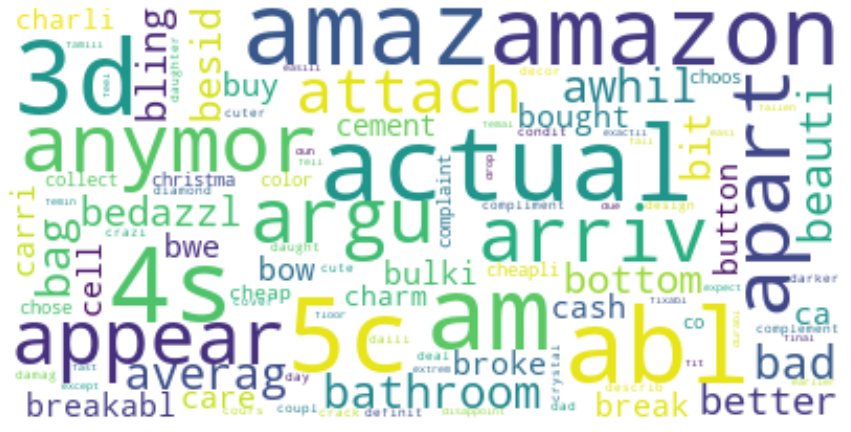

In [146]:
# Word Cloud Using Porter Stemming Bags of Word Model 

from wordcloud import WordCloud

text1 = " ".join(review for review in vectorizer.get_feature_names())


wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords=stop_words).generate(text1)
plt.figure(figsize = [15,12])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show();

**lemmatizing the messages**

In [147]:
# lemmatise reviews
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
reviewTexts = [preprocess(review, stem=False) for review in text.reviewText]

# bag of words model
vectorizer = CountVectorizer()
bow_model = vectorizer.fit_transform(reviewTexts)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [148]:
# look at the dataframe
pd.DataFrame(bow_model.toarray(), columns = vectorizer.get_feature_names())

00  25  3d  4s  5c  able  actually  amaze  amazon  ans  anymore  apart  \
0    0   0   0   0   0     0         0      0       0    0        0      0   
1    0   0   0   0   0     0         0      0       0    0        0      0   
2    0   0   0   0   0     0         1      0       0    0        0      0   
3    0   0   0   0   0     0         0      0       0    0        0      0   
4    0   0   0   0   0     0         0      0       0    0        0      0   
5    0   0   0   0   0     0         0      0       0    0        0      1   
6    0   0   0   0   0     0         0      0       0    0        0      0   
7    0   0   0   0   0     0         0      0       0    0        0      0   
8    0   0   0   0   0     0         0      0       0    0        0      0   
9    0   0   0   0   0     0         0      0       0    0        0      0   
10   0   0   0   0   0     0         0      0       0    0        0      0   
11   0   0   0   0   1     0         0      0       0    0        0      0   
12   0   0   0   0   0     0         0      0       0    0        0      0   
13   0   0   0   0   0     0         0      0       0    0        0      0   
14   0   0   0   0   0     0         0      0       0    0        0      0   
15   0   0   0   0   0     0         0      0       0    0        0      0   
16   0   0   0   0   0     0         0      0       0    0        0      0   
17   0   0   0   0   0     0         0      0       0    0        0      0   
18   1   1   0   0   0     0         0      0       0    0        0      0   
19   0   0   0   0   0     0         0      0       0    0        0      0   
20   0   0   0   0   0     0         0      0       0    0        1      0   
21   0   0   0   0   0     1         0      0       0    0        0      0   
22   0   0   0   0   0     0         0      0       0    0        0      0   
23   0   0   0   0   0     0         0      0       0    0        0      0   
24   0   0   0   0   0     0         0      0       0    0        0      0   
25   0   0   0   0   0     0         0      0       0    0        0      0   
26   0   0   0   0   0     0         0      0       0    0        0      0   
27   0   0   0   0   0     0         0      0       0    0        0      0   
28   0   0   0   0   0     0         0      0       0    0        0      0   
29   0   0   0   0   0     0         0      0       0    0        0      0   
30   0   0   1   0   0     0         0      0       0    0        0      0   
31   0   0   0   0   0     0         0      0       0    0        0      0   
32   0   0   0   0   0     0         0      0       0    0        0      0   
33   0   0   0   0   0     0         0      0       0    0        0      0   
34   0   0   0   0   0     0         1      0       0    0        0      0   
35   0   0   0   0   0     0         0      1       0    0        0      0   
36   0   0   0   0   0     0         0      0       0    0        0      0   
37   0   0   0   0   0     0         0      0       0    0        0      0   
38   0   0   0   0   0     0         0      0       0    0        0      0   
39   0   0   0   0   0     0         0      0       0    0        0      0   
40   0   0   0   0   0     0         0      0       0    0        0      0   
41   0   0   1   1   0     0         0      0       0    1        0      0   
42   0   0   1   0   0     0         0      1       0    0        0      0   
43   0   0   0   0   0     0         0      0       0    0        0      0   
44   0   0   0   0   0     0         0      0       0    0        0      0   
45   0   0   0   0   0     0         0      0       1    0        0      0   
46   0   0   0   0   0     0         0      0       0    0        0      0   
47   0   0   0   0   0     0         0      0       0    0        0      0   
48   0   0   0   0   0     0         0      0       0    0        0      0   
49   0   0   0   0   0     0         0      0       0    0        0      0   

    appear  appearance  a

In [149]:
print(vectorizer.get_feature_names())

['00', '25', '3d', '4s', '5c', 'able', 'actually', 'amaze', 'amazon', 'ans', 'anymore', 'apart', 'appear', 'appearance', 'argue', 'arrive', 'attach', 'average', 'awhile', 'bad', 'bag', 'bathroom', 'be', 'beautiful', 'beauty', 'bedazzle', 'besides', 'better', 'bite', 'bling', 'blings', 'bottom', 'bow', 'break', 'breakable', 'bulky', 'button', 'buy', 'bwe', 'ca', 'care', 'careful', 'carry', 'cash', 'cell', 'cement', 'charlie', 'charm', 'cheap', 'cheaply', 'choose', 'christmas', 'collection', 'color', 'come', 'complaints', 'complement', 'compliment', 'condition', 'cos', 'couple', 'course', 'cover', 'crack', 'crazy', 'crystals', 'cute', 'cuter', 'dad', 'daily', 'damage', 'darker', 'daughter', 'daughters', 'day', 'days', 'deal', 'decorative', 'definitely', 'describe', 'design', 'diamond', 'diamonds', 'disappoint', 'drop', 'due', 'duh', 'durable', 'earlier', 'easily', 'easy', 'exactly', 'exception', 'expect', 'extremely', 'fall', 'family', 'fast', 'feel', 'fell', 'females', 'femine', 'finall

In [150]:
len(vectorizer.get_feature_names())

266

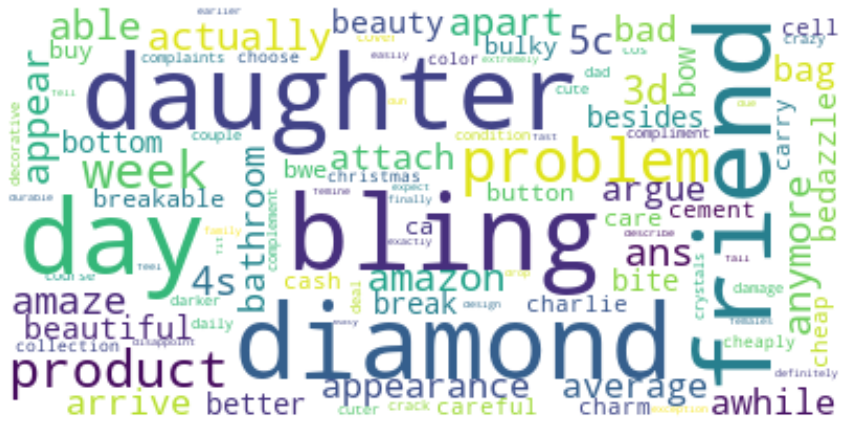

In [151]:
# Word Cloud Using Lemmatizing Wordnet Bags of Word Model 

from wordcloud import WordCloud

text2 = " ".join(review for review in vectorizer.get_feature_names())


wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords=stop_words).generate(text2)
plt.figure(figsize = [15,12])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show();

**Observation:**
Lemmetization seems to work much better with the words.

**Applying TF-IDF model**

In [152]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [153]:
df_text.head()

reviewText  \
0  Looks even better in person. Be careful to not drop your phone so often because the rhinestones ...   
1  When you don't want to spend a whole lot of cash but want a great deal...this is the shop to buy...   
2  so the case came on time, i love the design. I'm actually missing 2 studs but nothing too notice...   
3         DON'T CARE FOR IT.  GAVE IT AS A GIFT AND THEY WERE OKAY WITH IT.  JUST NOT WHAT I EXPECTED.   
4  I liked it because it was cute, but the studs fall off easily and to protect a phone this would ...   

  review_sentiment  
0         POSITIVE  
1         POSITIVE  
2         NEGATIVE  
3         POSITIVE  
4         POSITIVE

In [154]:
df_text.shape

(1045517, 2)

In [155]:
text.shape

(50, 2)

In [156]:
# extract the Questions from the dataframe
reviewTexts = text.reviewText
print(reviewTexts)

0     Looks even better in person. Be careful to not drop your phone so often because the rhinestones ...
1     When you don't want to spend a whole lot of cash but want a great deal...this is the shop to buy...
2     so the case came on time, i love the design. I'm actually missing 2 studs but nothing too notice...
3            DON'T CARE FOR IT.  GAVE IT AS A GIFT AND THEY WERE OKAY WITH IT.  JUST NOT WHAT I EXPECTED.
4     I liked it because it was cute, but the studs fall off easily and to protect a phone this would ...
5     The product looked exactly like the picture and it was very nice. However only days later it fel...
6     I FINALLY got my case today. It took forever to get here! It's cute and looks just like the pic....
7     It is a very cute case. None of the jewels have fallen off and the bow is glued on very well. Ca...
8     DO NOT BUY! this item is seriously cheap as heck. not worth buying it at all. I didn't even get ...
9     I really love this case... you have to k

In [157]:
# Converting revieText into list

reviewTexts = [review for review in reviewTexts]
print(reviewTexts)

['Looks even better in person. Be careful to not drop your phone so often because the rhinestones will fall off (duh). More of a decorative case than it is protective, but I will say that it fits perfectly and securely on my phone. Overall, very pleased with this purchase.', "When you don't want to spend a whole lot of cash but want a great deal...this is the shop to buy from!", "so the case came on time, i love the design. I'm actually missing 2 studs but nothing too noticeable the studding is almost a bit sloppy around the bow, but once again not too noticeable. I haven't put in my phone yet so this is just what I've notice so far", "DON'T CARE FOR IT.  GAVE IT AS A GIFT AND THEY WERE OKAY WITH IT.  JUST NOT WHAT I EXPECTED.", 'I liked it because it was cute, but the studs fall off easily and to protect a phone this would not be recommended. Buy if you just like it for looks.', "The product looked exactly like the picture and it was very nice. However only days later it fell apart. I

In [158]:
def preprocess(document):
    'changes document to lower case, removes stopwords and punctuations'

    # change sentence to lower case
    document = document.lower()

    # tokenize into words
    words = word_tokenize(document)

    # remove stop words
    words = [word for word in words if word not in stop_words]
    
    # for punctuation removal
    words = [word for word in words if word not in string.punctuation]

    # join words to make sentence
    document = " ".join(words)
    
    return document

In [159]:
# preprocess messages using the preprocess function
reviewTexts = [preprocess(review) for review in reviewTexts]
print(reviewTexts)

['looks better person careful not drop phone rhinestones fall duh decorative protective fits perfectly securely phone overall pleased purchase', "n't spend lot cash great deal ... shop buy", "time love design 'm actually missing 2 studs noticeable studding bit sloppy bow not noticeable n't phone 've notice", "n't care gift okay not expected", 'liked cute studs fall easily protect phone not recommended buy like looks', "product looked exactly like picture nice days fell apart 'm disappointed quality product", "finally got forever 's cute looks like pic like right wrote review rhinestones started falling package glue glue opinion good couple days n't purchase thanks", "cute none jewels fallen bow glued well time frame 'm happy purchase carry phone jeans fit tightly bow careful worth", "not buy item seriously cheap heck not worth buying n't losing gems wish got money item", "love ... phone time 's pretty good quality stones normal unless purse day", 'super cute makes phone pretting love s

In [160]:
# bag of words model using TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf_model = vectorizer.fit_transform(reviewTexts)

In [161]:
# Let's look at the dataframe
tfidf = pd.DataFrame(tfidf_model.toarray(), columns = vectorizer.get_feature_names())
tfidf

00        25        3d        4s      5c      able  actually  \
0   0.000000  0.000000  0.000000  0.000000  0.0000  0.000000  0.000000   
1   0.000000  0.000000  0.000000  0.000000  0.0000  0.000000  0.000000   
2   0.000000  0.000000  0.000000  0.000000  0.0000  0.000000  0.242016   
3   0.000000  0.000000  0.000000  0.000000  0.0000  0.000000  0.000000   
4   0.000000  0.000000  0.000000  0.000000  0.0000  0.000000  0.000000   
5   0.000000  0.000000  0.000000  0.000000  0.0000  0.000000  0.000000   
6   0.000000  0.000000  0.000000  0.000000  0.0000  0.000000  0.000000   
7   0.000000  0.000000  0.000000  0.000000  0.0000  0.000000  0.000000   
8   0.000000  0.000000  0.000000  0.000000  0.0000  0.000000  0.000000   
9   0.000000  0.000000  0.000000  0.000000  0.0000  0.000000  0.000000   
10  0.000000  0.000000  0.000000  0.000000  0.0000  0.000000  0.000000   
11  0.000000  0.000000  0.000000  0.000000  0.4007  0.000000  0.000000   
12  0.000000  0.000000  0.000000  0.000000  0.0000  0.000000  0.000000   
13  0.000000  0.000000  0.000000  0.000000  0.0000  0.000000  0.000000   
14  0.000000  0.000000  0.000000  0.000000  0.0000  0.000000  0.000000   
15  0.000000  0.000000  0.000000  0.000000  0.0000  0.000000  0.000000   
16  0.000000  0.000000  0.000000  0.000000  0.0000  0.000000  0.000000   
17  0.000000  0.000000  0.000000  0.000000  0.0000  0.000000  0.000000   
18  0.315682  0.315682  0.000000  0.000000  0.0000  0.000000  0.000000   
19  0.000000  0.000000  0.000000  0.000000  0.0000  0.000000  0.000000   
20  0.000000  0.000000  0.000000  0.000000  0.0000  0.000000  0.000000   
21  0.000000  0.000000  0.000000  0.000000  0.0000  0.377613  0.000000   
22  0.000000  0.000000  0.000000  0.000000  0.0000  0.000000  0.000000   
23  0.000000  0.000000  0.000000  0.000000  0.0000  0.000000  0.000000   
24  0.000000  0.000000  0.000000  0.000000  0.0000  0.000000  0.000000   
25  0.000000  0.000000  0.000000  0.000000  0.0000  0.000000  0.000000   
26  0.000000  0.000000  0.000000  0.000000  0.0000  0.000000  0.000000   
27  0.000000  0.000000  0.000000  0.000000  0.0000  0.000000  0.000000   
28  0.000000  0.000000  0.000000  0.000000  0.0000  0.000000  0.000000   
29  0.000000  0.000000  0.000000  0.000000  0.0000  0.000000  0.000000   
30  0.000000  0.000000  0.295573  0.000000  0.0000  0.000000  0.000000   
31  0.000000  0.000000  0.000000  0.000000  0.0000  0.000000  0.000000   
32  0.000000  0.000000  0.000000  0.000000  0.0000  0.000000  0.000000   
33  0.000000  0.000000  0.000000  0.000000  0.0000  0.000000  0.000000   
34  0.000000  0.000000  0.000000  0.000000  0.0000  0.000000  0.368381   
35  0.000000  0.000000  0.000000  0.000000  0.0000  0.000000  0.000000   
36  0.000000  0.000000  0.000000  0.000000  0.0000  0.000000  0.000000   
37  0.000000  0.000000  0.000000  0.000000  0.0000  0.000000  0.000000   
38  0.000000  0.000000  0.000000  0.000000  0.0000  0.000000  0.000000   
39  0.000000  0.000000  0.000000  0.000000  0.0000  0.000000  0.000000   
40  0.000000  0.000000  0.000000  0.000000  0.0000  0.000000  0.000000   
41  0.000000  0.000000  0.312456  0.373541  0.0000  0.000000  0.000000   
42  0.000000  0.000000  0.182933  0.000000  0.0000  0.000000  0.000000   
43  0.000000  0.000000  0.000000  0.000000  0.0000  0.000000  0.000000   
44  0.000000  0.000000  0.000000  0.000000  0.0000  0.000000  0.000000   
45  0.000000  0.000000  0.000000  0.000000  0.0000  0.000000  0.000000   
46  0.000000  0.000000  0.000000  0.000000  0.0000  0.000000  0.000000   
47  0.000000  0.000000  0.000000  0.000000  0.0000  0.000000  0.000000   
48  0.000000  0.000000  0.000000  0.000000  0.0000  0.000000  0.000000   
49  0.000000  0.000000  0.000000  0.000000  0.0000  0.000000  0.000000   

          am    amazed   amazing    amazon       ans   anymore    apart  \
0   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.00000   
1   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.00000   
2   0.0000

In [162]:
# token names
print(vectorizer.get_feature_names())

['00', '25', '3d', '4s', '5c', 'able', 'actually', 'am', 'amazed', 'amazing', 'amazon', 'ans', 'anymore', 'apart', 'appearance', 'appears', 'argue', 'arrive', 'attached', 'average', 'awhile', 'bad', 'bags', 'bathroom', 'beautiful', 'beauty', 'bedazzled', 'besides', 'better', 'bit', 'bling', 'blings', 'bottom', 'bought', 'bow', 'break', 'breakable', 'broke', 'bulky', 'buttons', 'buy', 'buying', 'bwe', 'ca', 'care', 'careful', 'carry', 'cash', 'cell', 'cement', 'charlie', 'charming', 'cheap', 'cheaply', 'choose', 'chose', 'christmas', 'collection', 'color', 'comes', 'complaints', 'complements', 'compliments', 'condition', 'cos', 'couple', 'course', 'cover', 'cracked', 'crazy', 'crystals', 'cute', 'cuter', 'dad', 'daily', 'damaged', 'darker', 'daughter', 'daughters', 'day', 'days', 'deal', 'decorative', 'definitely', 'described', 'design', 'diamond', 'diamonds', 'disappointed', 'drop', 'dropped', 'dropping', 'due', 'duh', 'durable', 'earlier', 'easily', 'easy', 'exactly', 'exception', 'ex

In [163]:
len(vectorizer.get_feature_names())

295

**Observation:**
we can see TF-IDF technique produces much clearner and less noisy words, hence we will build ou model on this technique

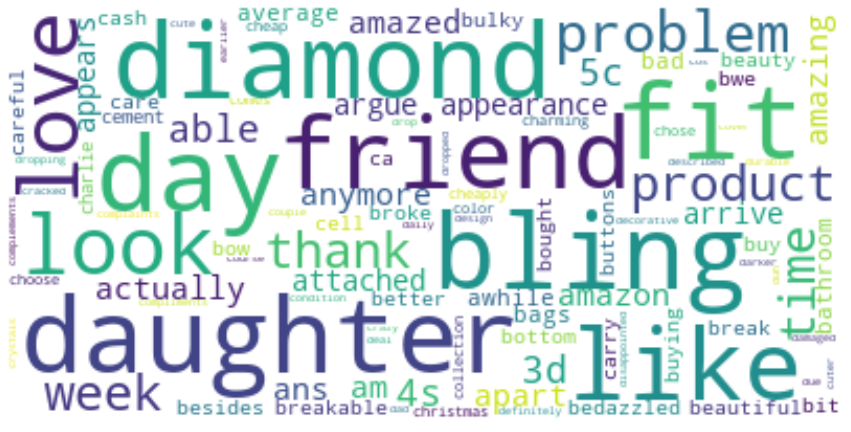

In [164]:
# Word Cloud Using Tf-IDF Bags of Word Model 

from wordcloud import WordCloud

text3 = " ".join(review for review in vectorizer.get_feature_names())


wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords=stop_words).generate(text3)
plt.figure(figsize = [15,12])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show();

**Model Building & Evaluation**

In [165]:
merge_df.head()

also_buy    brand also_view                   main_cat  price        asin  \
0       []  ELEGANI        []  Cell Phones & Accessories   9.99  7508492919   
1       []  ELEGANI        []  Cell Phones & Accessories   9.99  7508492919   
2       []  ELEGANI        []  Cell Phones & Accessories   9.99  7508492919   
3       []  ELEGANI        []  Cell Phones & Accessories   9.99  7508492919   
4       []  ELEGANI        []  Cell Phones & Accessories   9.99  7508492919   

   ratings  verified      reviewerID      reviewerName  \
0      5.0      True  A24E3SXTC62LJI  Claudia Valdivia   
1      5.0      True  A269FLZCB4GIPV       sarah ponce   
2      3.0      True   AB6CHQWHZW4TV               Kai   
3      2.0      True   A1M117A53LEI8   Sharon Williams   
4      4.0      True  A272DUT8M88ZS8   Bella Rodriguez   

                                                                                            reviewText  \
0  Looks even better in person. Be careful to not drop your phone so often because the rhinestones ...   
1  When you don't want to spend a whole lot of cash but want a great deal...this is the shop to buy...   
2  so the case came on time, i love the design. I'm actually missing 2 studs but nothing too notice...   
3         DON'T CARE FOR IT.  GAVE IT AS A GIFT AND THEY WERE OKAY WITH IT.  JUST NOT WHAT I EXPECTED.   
4  I liked it because it was cute, but the studs fall off easily and to protect a phone this would ...   

  review_sentiment  year  month  polarity  TB_score  review_len  word_count  
0         POSITIVE  2014      8  0.331250  Positive         271          49  
1         POSITIVE  2014      2  0.600000  Positive         102          22  
2         NEGATIVE  2014      2 -0.004167  Negative         257          51  
3         POSITIVE  2014      2  0.200000  Positive          92          20  
4         POSITIVE  2014      2  0.511111  Positive         150          31

In [166]:
df_text = merge_df[["brand", "reviewerName", "reviewText", "review_sentiment"]]
df_text.head()

brand      reviewerName  \
0  ELEGANI  Claudia Valdivia   
1  ELEGANI       sarah ponce   
2  ELEGANI               Kai   
3  ELEGANI   Sharon Williams   
4  ELEGANI   Bella Rodriguez   

                                                                                            reviewText  \
0  Looks even better in person. Be careful to not drop your phone so often because the rhinestones ...   
1  When you don't want to spend a whole lot of cash but want a great deal...this is the shop to buy...   
2  so the case came on time, i love the design. I'm actually missing 2 studs but nothing too notice...   
3         DON'T CARE FOR IT.  GAVE IT AS A GIFT AND THEY WERE OKAY WITH IT.  JUST NOT WHAT I EXPECTED.   
4  I liked it because it was cute, but the studs fall off easily and to protect a phone this would ...   

  review_sentiment  
0         POSITIVE  
1         POSITIVE  
2         NEGATIVE  
3         POSITIVE  
4         POSITIVE

In [167]:
df_text.shape

(1045517, 4)

In [168]:
# Train Test Split
from sklearn.model_selection import train_test_split
X = df_text[["brand", "reviewerName", "reviewText"]]
y = df_text.review_sentiment
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state = 42)
print("Value counts for Train sentiments")
print(y_train.value_counts())
    
print("Value counts for Test sentiments")
print(y_test.value_counts())
print(" ")
print(type(X_train))
print(type(y_train))
print(" ")
print(X_train.head())

Value counts for Train sentiments
POSITIVE    573535
NEGATIVE    158326
Name: review_sentiment, dtype: int64
Value counts for Test sentiments
POSITIVE    246222
NEGATIVE     67434
Name: review_sentiment, dtype: int64
 
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
 
               brand         reviewerName  \
611455  AmazonBasics  Nicholas A. Raviele   
122111      In Angel        Saffa Kemokai   
174978       QQ-Tech           Ricardo E.   
577517   CASEFORMERS                  EOP   
483693      DRESSIER            Alma Cruz   

                                                                                                 reviewText  
611455  works very well with my iPad2.  I have not hooked it up to the computer, only charged it, but he...  
122111  This looks like designed for Galaxy Note series. Was looking for for one for Galaxy Mega. Size t...  
174978                            Great product. Recommend it to everyone. Very good seller too. Thank y

In [169]:
df_text.head()

brand      reviewerName  \
0  ELEGANI  Claudia Valdivia   
1  ELEGANI       sarah ponce   
2  ELEGANI               Kai   
3  ELEGANI   Sharon Williams   
4  ELEGANI   Bella Rodriguez   

                                                                                            reviewText  \
0  Looks even better in person. Be careful to not drop your phone so often because the rhinestones ...   
1  When you don't want to spend a whole lot of cash but want a great deal...this is the shop to buy...   
2  so the case came on time, i love the design. I'm actually missing 2 studs but nothing too notice...   
3         DON'T CARE FOR IT.  GAVE IT AS A GIFT AND THEY WERE OKAY WITH IT.  JUST NOT WHAT I EXPECTED.   
4  I liked it because it was cute, but the studs fall off easily and to protect a phone this would ...   

  review_sentiment  
0         POSITIVE  
1         POSITIVE  
2         NEGATIVE  
3         POSITIVE  
4         POSITIVE

***Applying Multinomial Naive Bayes**

In [170]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix

mnb = Pipeline([('vect', CountVectorizer(stop_words = stop_words)),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
mnb.fit(X_train['reviewText'].apply(lambda x: np.str_(x)), y_train)

#%%time
from sklearn.metrics import classification_report
y_pred = mnb.predict(X_test['reviewText'].apply(lambda x: np.str_(x)))

print('accuracy %s' % accuracy_score(y_pred, y_test))
#print(classification_report(y_test, y_pred, target_names = df_text['review_sentiment'].unique()))

accuracy 0.8105504119162394


**Observation:**

Accuracy = Correctly Predicted Labels / Total Number of Labels

'Positive' reviews being actually identified as Positive
'Negative' reviews being actually identified as Negative
As we have achieve an accuracy of 81% but we need to improve it 



***Applying confusion matrix we got for our final model**




In [171]:
mnb

Pipeline(steps=[('vect',
                 CountVectorizer(stop_words=['a', 'about', 'above', 'across',
                                             'after', 'again', 'all', 'almost',
                                             'alone', 'along', 'already',
                                             'also', 'although', 'always',
                                             'among', 'an', 'and', 'another',
                                             'any', 'anybody', 'anyone',
                                             'anything', 'anywhere', 'are',
                                             'area', 'areas', 'around', 'as',
                                             'ask', 'asked', ...])),
                ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])

**Observation:**
Using stopwords in CountVectorizer has helped us improve the accuracy of the model

In [172]:
# predicting probabilities of test data
proba = mnb.predict_proba(X_test['reviewText'].apply(lambda x: np.str_(x)))
proba

array([[0.05972756, 0.94027244],
       [0.09468221, 0.90531779],
       [0.05026127, 0.94973873],
       ...,
       [0.0150833 , 0.9849167 ],
       [0.0150833 , 0.9849167 ],
       [0.01459351, 0.98540649]])

In [173]:
# confusion matrix
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred)

array([[  8698,  58736],
       [   686, 245536]])

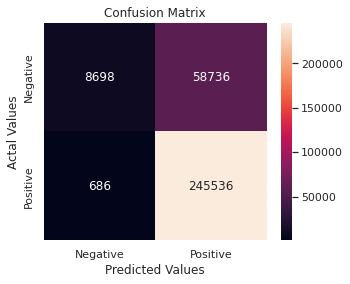

In [174]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt


cm = confusion_matrix(y_test,y_pred)
cm_df = pd.DataFrame(cm,
                     index = ['Negative','Positive'], 
                     columns = ['Negative','Positive'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True,fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

**Observation:**

The actual labels are along the column while the predicted labels are along the rows
686 reviews are actually 'Positive' but predicted as 'Negative' by the model, whereas 8698 reviews are correctly predicted as 'Negative'. On the other hand, 686 & 245536 are actual Positives in total but the model missed on a small chunk of it which is doable.
Now, the model predicts 58736 as Positive reviews whereas those are negative reviews, which might mislead in identifing those brands having positive reviews. This is a bit risky.
This brings us to two of the most commonly used metrics to evaluate a classification model:

Sensitivity: (From out of all the positives how much did you actually detect)

Specificity: (From out of all the negatives how much did you actually detect)

Actual/Predicted Not Churn

Not Churn True Negatives False Positives

Churn False Negatives True Positives

In [175]:
confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

[[  8698  58736]
 [   686 245536]]


In [176]:
sensitivity = TP / float(FN + TP)
print("sensitivity",sensitivity)

sensitivity 0.9972138964024336


**Observation:**
We have a good sensitivity. When a test’s sensitivity is high, it is less likely to give a false negative. 

In a test with high sensitivity, a positive is positive. This can be verified as we get 686 as False Negatives.

In [177]:
specificity = TN / float(TN + FP)
print("specificity",specificity)

specificity 0.12898537829581516


**Observation:**
We have a very low specificity.

A test with low specificity can be thought of as being too eager to find a positive result, even when it is not present, and may give a high number of false positives. 

This can also be verified as we have higher number of FP i.e 58736

In [178]:
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print("PRECISION SCORE :", precision_score(y_test, y_pred, pos_label='POSITIVE'))
print("RECALL SCORE :", recall_score(y_test, y_pred, pos_label='POSITIVE'))
print("F1 SCORE :", metrics.f1_score(y_test, y_pred, pos_label='POSITIVE'))

PRECISION SCORE : 0.806962191723195
RECALL SCORE : 0.9972138964024336
F1 SCORE : 0.8920569524826792


**Observation:** As we can see the precision score , recall score , F1 Score are decent.

In [179]:
y_test.head()

949709     POSITIVE
270149     POSITIVE
263415     POSITIVE
826550     NEGATIVE
1062371    NEGATIVE
Name: review_sentiment, dtype: object

In [180]:
# mapping labels to 0 and 1 in y_pred
y_test = y_test.map({'NEGATIVE':0, 'POSITIVE':1})

In [200]:

# creating an ROC curve
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

# area under the curve
print(roc_auc)


0.9300492881807698


**Visualization on ROC Curve**


Roc curve defines or shows increase in sensitivity will be accompanied by a decrease in specificity.

The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.

The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test

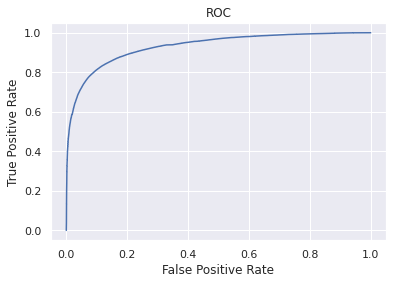

In [203]:
# plotting the ROC curve
%matplotlib inline  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)

**Observation:**
The area under the curve is 0.93 which is good enough.

Note: The good model is the one in which TPR is high (Closer to 100%) and FPR is low (Closer to 0%). Hence need to balance these two.

TPR and FPR are nothing but sensitivity and (1 — specificity), so it can also be looked at as a tradeoff between sensitivity and specificity.

***Displaying a Buisness Use Case**

In [ ]:
# Creating a new column from Predictions from model

X_test['sentiment_predicted'] = y_pred

In [ ]:
# Assume you have launched a product in market and you need to see what is the sentiment of that particular product. 

temp = X_test.loc[X_test['brand']=="Motorola"].reset_index(drop=True)

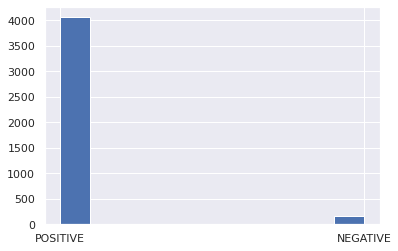

In [ ]:
# Visualizing the sentiments for the product

temp['sentiment_predicted'].hist()

**Observation-** As we can see Positive is at high end and negative at low end .

In [ ]:
negative_df = temp.loc[temp['sentiment_predicted']=='NEGATIVE'].reset_index(drop=True)

In [ ]:
negative_df.head()

brand                 reviewerName  \
0  Motorola                     Leonardo   
1  Motorola              Amazon Customer   
2  Motorola                     Jason C.   
3  Motorola  melvin calderon encarnacion   
4  Motorola                       Daniel   

                                                                                            reviewText  \
0                                                                                            Excelent.   
1  The phone overall is OK.  Good reception, small, easy to use.  Problems:\n\n1.  The battery is T...   
2  Uggg.\n\nThis was fine for awhile, but the connection got worse and worse. (HOW?!?!? IT"S DIGITA...   
3                                                                                    excelente telfono   
4                                                                            Excelente...good quality.   

  sentiment_predicted  
0            NEGATIVE  
1            NEGATIVE  
2            NEGATIVE  
3            NEGATIVE  
4            NEGATIVE

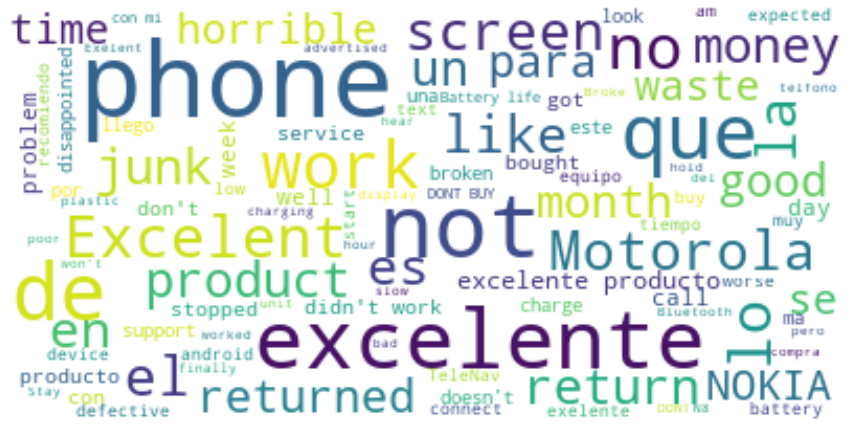

In [ ]:
from wordcloud import WordCloud

text = " ".join(str(review) for review in negative_df.reviewText)


wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords=stop_words).generate(text)
plt.figure(figsize=[15,10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show();

In [ ]:
# Also, let's assume you want to see what is the ratio of reviews a particular reviewer has posted on Amazon

temp1 = X_test.loc[X_test['reviewerName']=="Daniel"].reset_index(drop=True)

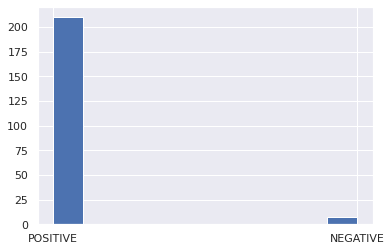

In [ ]:
# Visualizing the sentiments for a particular Reviewer 

temp1['sentiment_predicted'].hist()

**Conclusion:**

**We have achieved an accuracy score of 81% using the Multinomial Naive Bayes Classifier model building technique here.**

**The area under the ROC curve is 93%.**